# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Deep Learning
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError

import joblib

In [2]:
df = pd.read_csv('../data/Dummy Data AI Restructure Approval rev7.csv')
df.head(10)

debtor_nik                   debtor_name debtor_gender  \
0  4133431716345918              Cemplunk Zulaika     perempuan   
1  7873621118387801         Clara Padmasari, M.Pd     laki-laki   
2  9937369990430445  Puti Cinthia Oktaviani, S.IP     laki-laki   
3  2071079715934185          Lalita Astuti, M.TI.     laki-laki   
4  8852740896362143                Daliman Kusumo     laki-laki   
5  7357561150554991               Hamima Yuliarti     perempuan   
6  8053189640415342              Kiandra Hassanah     perempuan   
7  9991549820336113                 Jayadi Rajata     laki-laki   
8  5895624548775186           Farhunnisa Prastuti     laki-laki   
9  9463374064016974                Janet Haryanti     laki-laki   

            debtor_birth_place  \
0         Bengkulu, 23-09-1997   
1      Jawa Tengah, 13-04-1964   
2      Jawa Tengah, 01-09-1981   
3             Aceh, 14-02-1987   
4        Gorontalo, 06-12-1998   
5  Sulawesi Tengah, 22-03-1972   
6  Sulawesi Tengah, 24-01-1971   
7   Sumatera Utara, 08-12-1970   
8       Jawa Timur, 10-08-1975   
9     Maluku Utara, 19-05-1969   

                                      debtor_address  debtor_zip  debtor_rt  \
0  Jalan Raya Setiabudhi No. 857\nBanjarbaru, KR ...       12188          6   
1  Jalan Cihampelas No. 4\nPekanbaru, Sulawesi Se...       56126         20   
2           Jl. Wonoayu No. 68\nSemarang, Riau 98101       98101          2   
3    Gg. Sentot Alibasa No. 781\nPontianak, SU 76993       76993         19   
4   Jl. Ronggowarsito No. 0\nTanjungpinang, NB 06297        6297          1   
5  Gg. Dipenogoro No. 2\nBogor, Kalimantan Timur ...       17655          8   
6  Jl. Rumah Sakit No. 52\nTomohon, Kalimantan Te...       60416          2   
7  Jl. Rungkut Industri No. 258\nBukittinggi, Mal...         178          7   
8              Jl. Indragiri No. 8\nBinjai, RI 99838       99838         16   
9  Gg. Tubagus Ismail No. 81\nTual, Sulawesi Bara...       59050         15   

   debtor_rw debtor_marital_status                          debtor_company  \
0         10               Menikah         CV Nugroho Melani (Persero) Tbk   
1         20               Menikah                              UD Hidayat   
2         15            Cerai mati  UD Simanjuntak Padmasari (Persero) Tbk   
3         16               Menikah            Perum Handayani Najmudin Tbk   
4          1           Cerai hidup            PD Hardiansyah (Persero) Tbk   
5          9            Cerai mati             PT Firmansyah (Persero) Tbk   
6         12            Cerai mati                             PD Prasasta   
7         12            Cerai mati                              CV Puspita   
8          7           Cerai hidup                          CV Pratama Tbk   
9         10         Belum menikah        UD Narpati Riyanti (Persero) Tbk   

   ... old_tenor  old_collateral  fee_installments       ltv  remaining_loan  \
0  ...      33.0      32800000.0          100000.0  0.892799      39800000.0   
1  ...      54.0       8100000.0          870000.0  1.277273        300000.0   
2  ...       6.0      45400000.0          670000.0  0.974858      14200000.0   
3  ...      51.0      41700000.0          920000.0  0.843839      15900000.0   
4  ...      45.0       4900000.0          870000.0  1.028472       5500000.0   
5  ...      24.0      41000000.0          660000.0  0.883739      23400000.0   
6  ...      42.0      50500000.0          870000.0  0.831698      74300000.0   
7  ...      60.0      63800000.0          670000.0  0.833858      44900000.0   
8  ...      36.0       5800000.0         1000000.0  1.449074       5100000.0   
9  ...      39.0       2100000.0          770000.0  1.692857       3200000.0   

   arrear_amount  monthly_income_family  monthly_expense_family  \
0            2.0             44200000.0              24700000.0   
1            1.0             88000000.0              36200000.0   
2            3.0             19500000.0              15700000.0   
3            7.0  

# EDA (Exploratory Data Analysis)

### Informasi data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   debtor_nik                      5000 non-null   int64  
 1   debtor_name                     5000 non-null   object 
 2   debtor_gender                   5000 non-null   object 
 3   debtor_birth_place              5000 non-null   object 
 4   debtor_address                  5000 non-null   object 
 5   debtor_zip                      5000 non-null   int64  
 6   debtor_rt                       5000 non-null   int64  
 7   debtor_rw                       5000 non-null   int64  
 8   debtor_marital_status           5000 non-null   object 
 9   debtor_company                  5000 non-null   object 
 10  debtor_number                   5000 non-null   object 
 11  debtor_id                       3777 non-null   float64
 12  debtor_age                      37

### Deskripsi statistik

In [4]:
df.describe()

debtor_nik    debtor_zip   debtor_rt    debtor_rw     debtor_id  \
count  5.000000e+03   5000.000000  5000.00000  5000.000000  3.777000e+03   
mean   5.524571e+15  50191.166600    10.66060    10.575400  3.797036e+17   
std    2.591200e+15  28833.170041     5.75288     5.811185  1.251357e+18   
min    1.001567e+15     64.000000     1.00000     1.000000  6.040096e+10   
25%    3.288243e+15  24582.750000     6.00000     6.000000  1.800058e+14   
50%    5.584596e+15  51219.000000    11.00000    11.000000  3.518681e+15   
75%    7.784302e+15  74775.250000    16.00000    16.000000  4.671615e+15   
max    9.999256e+15  99979.000000    20.00000    20.000000  4.999998e+18   

        debtor_age  monthly_income          debt          dti  \
count  3777.000000    3.777000e+03  3.777000e+03  3777.000000   
mean     41.281176    3.855976e+07  3.870212e+06     0.161762   
std      13.770376    2.586694e+07  2.356101e+06     0.253931   
min      18.000000    1.000000e+06  8.333333e+04     0.000966   
25%      29.000000    1.920000e+07  1.833333e+06     0.056727   
50%      41.000000    3.310000e+07  3.625000e+06     0.112245   
75%      53.000000    5.220000e+07  5.858333e+06     0.201346   
max      65.000000    1.000000e+08  8.333333e+06     5.628788   

       monthly_expenses  ...  monthly_payments    old_tenor  old_collateral  \
count      3.777000e+03  ...      3.777000e+03  3777.000000    3.777000e+03   
mean       1.952438e+07  ...      7.734235e+05    30.640191    2.527427e+07   
std        1.800117e+07  ...      1.833816e+06    17.738433    2.173094e+07   
min        1.000000e+06  ...      0.000000e+00     0.000000    9.000000e+05   
25%        6.000000e+06  ...      2.699223e+05    15.000000    7.700000e+06   
50%        1.390000e+07  ...      4.115456e+05    30.000000    1.870000e+07   
75%        2.770000e+07  ...      5.572486e+05    45.000000    3.840000e+07   
max        9.740000e+07  ...      2.504444e+07    60.000000    9.570000e+07   

       fee_installments          ltv  remaining_loan  arrear_amount  \
count       3777.000000  3777.000000    3.777000e+03    3777.000000   
mean      481037.860736     1.036727    1.627961e+07       2.638602   
std       298491.942117     0.587153    1.494687e+07       1.457710   
min            0.000000     0.000000    0.000000e+00       0.000000   
25%       230000.000000     0.843468    4.700000e+06       2.000000   
50%       470000.000000     0.899901    1.170000e+07       2.000000   
75%       740000.000000     1.014638    2.400000e+07       3.000000   
max      1000000.000000     8.775000    8.020000e+07      10.000000   

       monthly_income_family  monthly_expense_family  asset_value_family  
count           3.777000e+03            3.777000e+03        3.777000e+03  
mean            3.541530e+07            1.975107e+07        5.087752e+07  
std             2.701843e+07            1.811737e+07        2.871560e+07  
min             1.000000e+06            1.000000e+06        1.000000e+06  
25%             1.300000e+07            6.000000e+06        2.610000e+07  
50%             2.960000e+07            1.410000e+07        5.120000e+07  
75%             4.980000e+07            2.750000e+07        7.600000e+07  
max             1.000000e+08            9.620000e+07        1.000000e+08  

[8 rows x 32 columns]

### Checking valui tenor is 0

In [5]:
df.loc[df['tenor'] == 0].count()

debtor_nik                        100
debtor_name                       100
debtor_gender                     100
debtor_birth_place                100
debtor_address                    100
debtor_zip                        100
debtor_rt                         100
debtor_rw                         100
debtor_marital_status             100
debtor_company                    100
debtor_number                     100
debtor_id                         100
debtor_age                        100
debtor_occupation                 100
monthly_income                    100
debt                              100
dti                               100
monthly_expenses                  100
net_income                        100
asset_value                       100
previous_credit_monthly_income    100
financial_changes                 100
business_conditions               100
credit_score                      100
amount_of_late_days               100
credit_goals                      100
collateral  

### Checking missing value

In [6]:
df.isna().sum()

debtor_nik                           0
debtor_name                          0
debtor_gender                        0
debtor_birth_place                   0
debtor_address                       0
debtor_zip                           0
debtor_rt                            0
debtor_rw                            0
debtor_marital_status                0
debtor_company                       0
debtor_number                        0
debtor_id                         1223
debtor_age                        1223
debtor_occupation                 1223
monthly_income                    1223
debt                              1223
dti                               1223
monthly_expenses                  1223
net_income                        1223
asset_value                       1223
previous_credit_monthly_income    1223
financial_changes                 1223
business_conditions               1223
credit_score                      1223
amount_of_late_days               1223
credit_goals             

### Checking duplicate data

In [7]:
df.duplicated().sum()

0

### Histogram plot

In [8]:
#sns.pairplot(df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


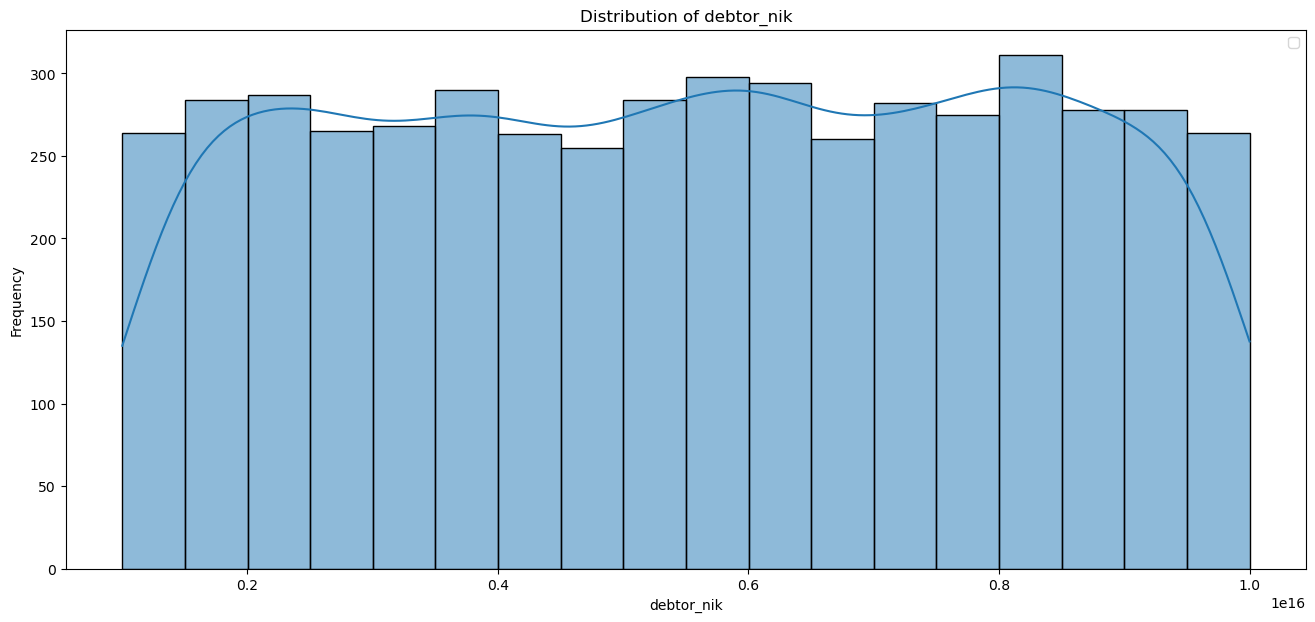

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


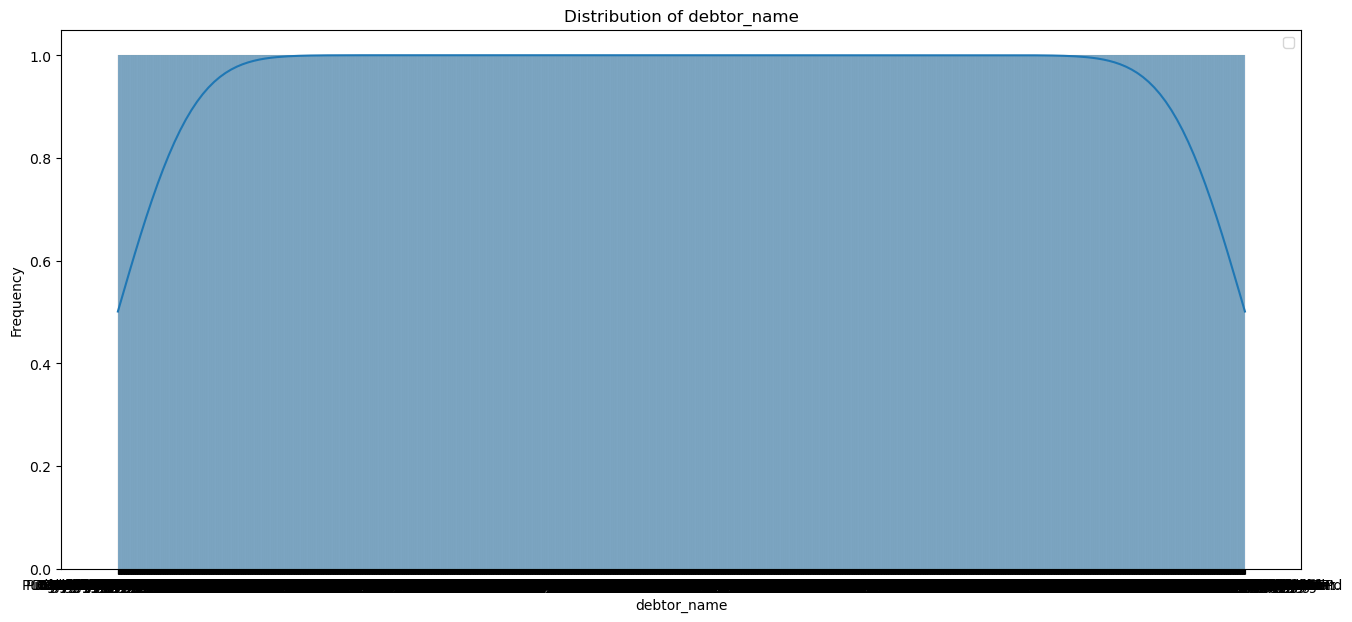

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


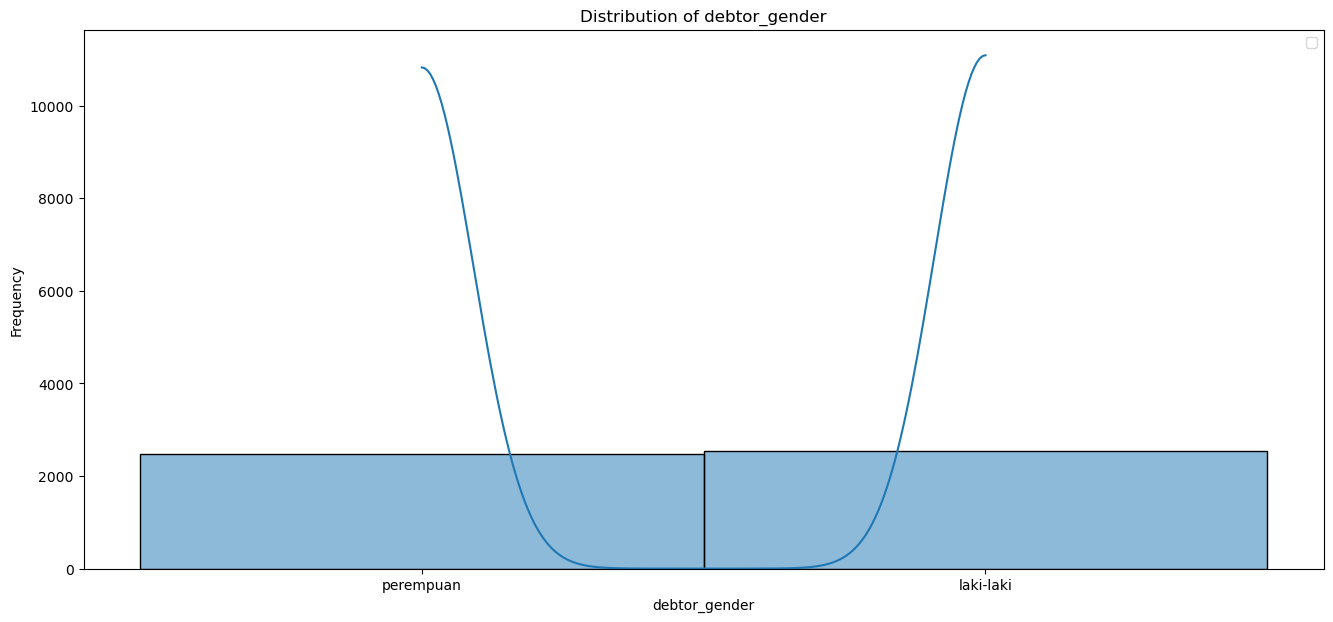

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


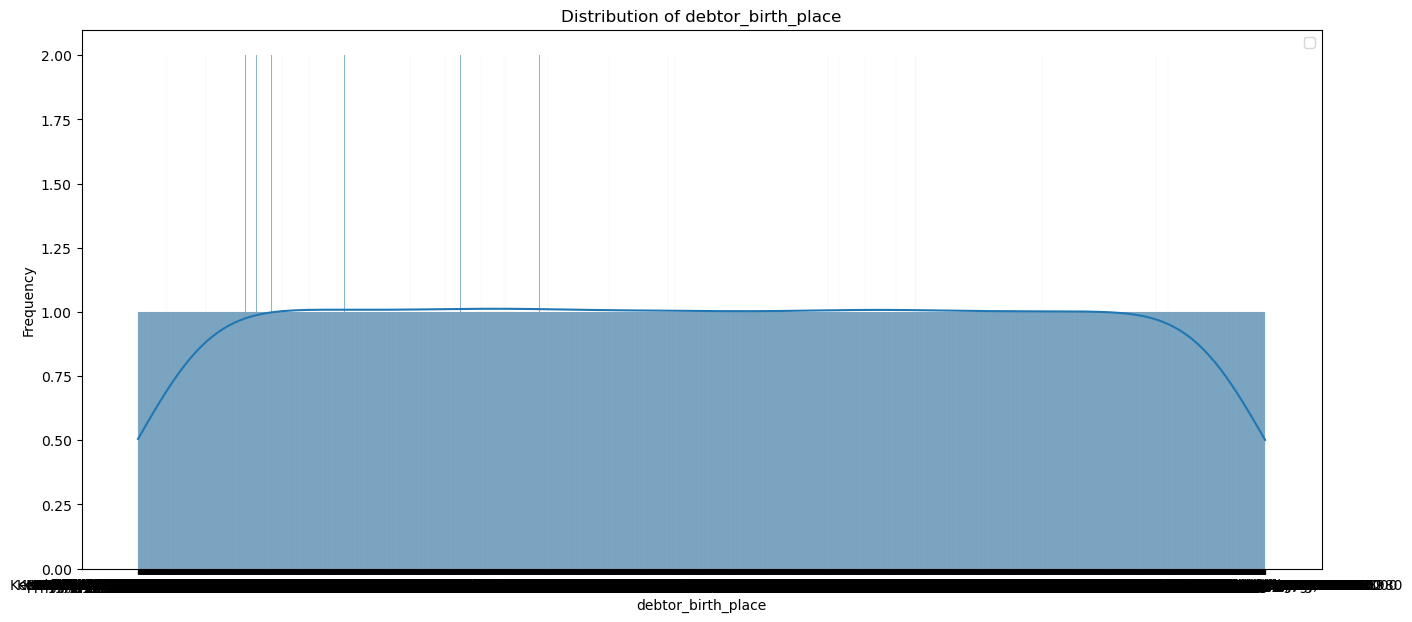

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


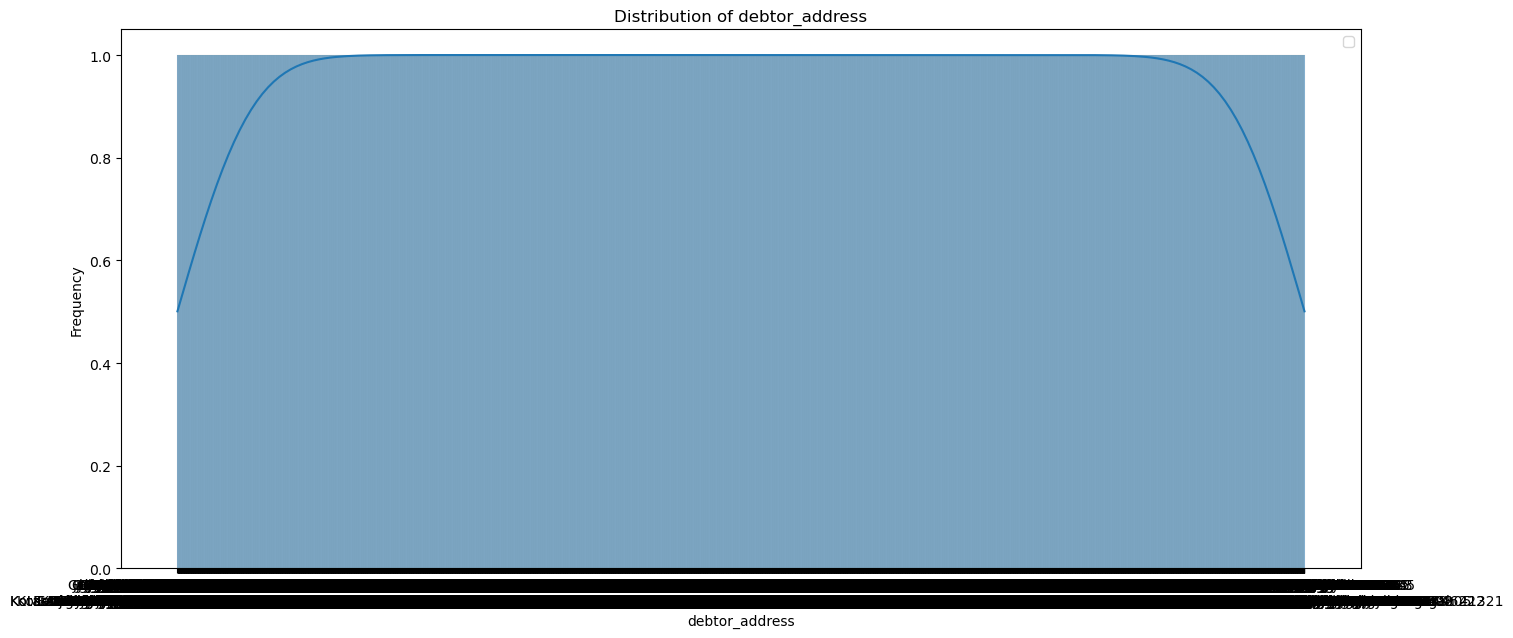

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


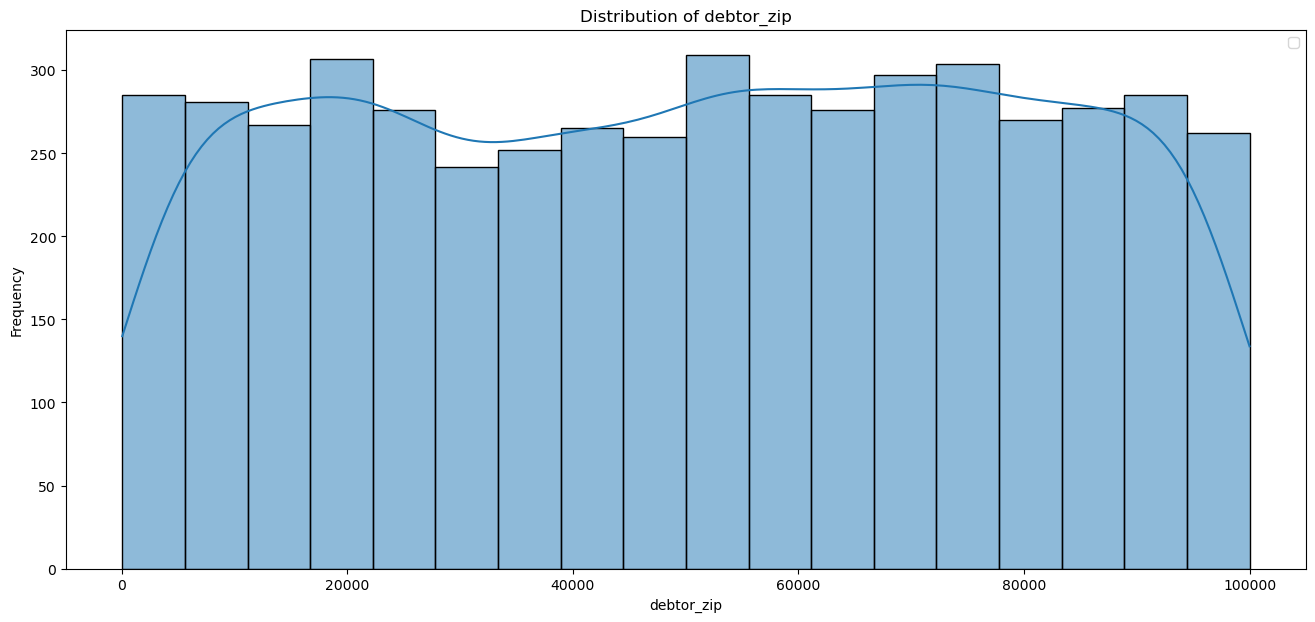

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


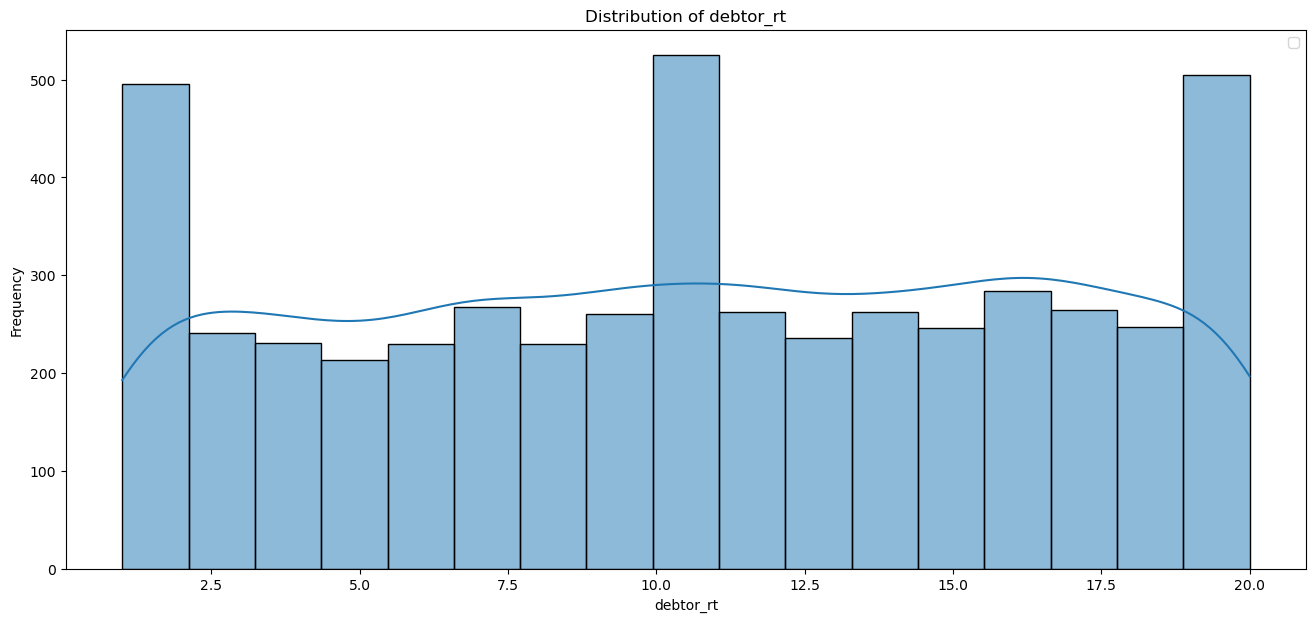

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


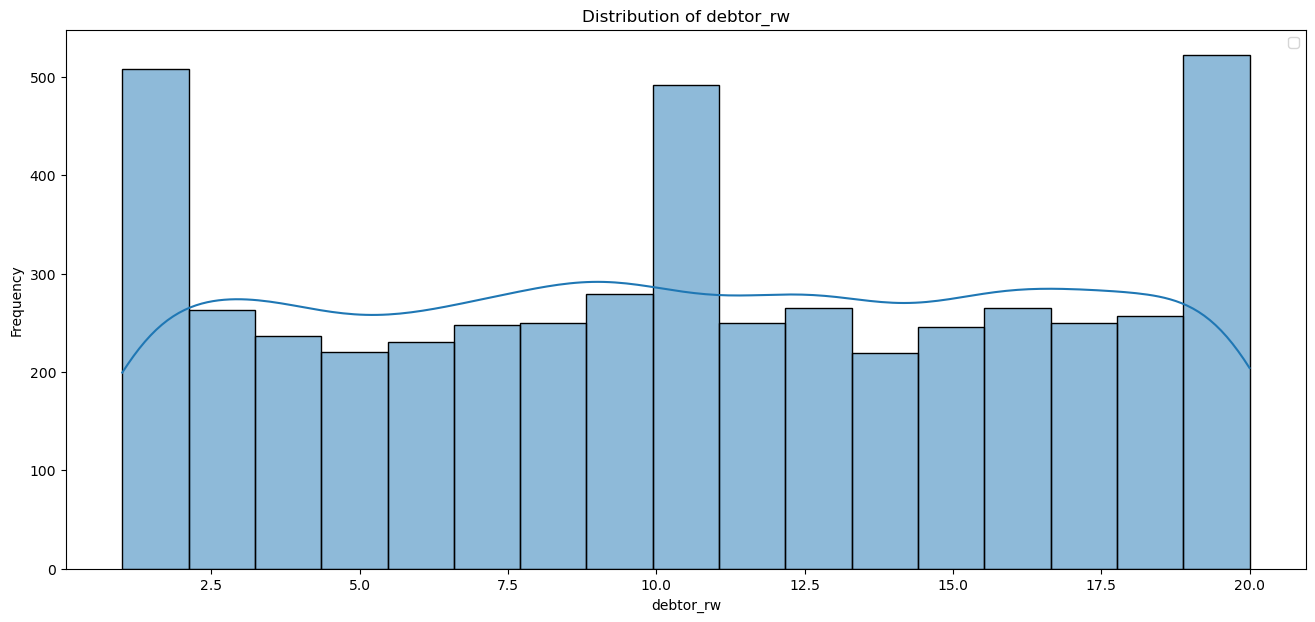

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


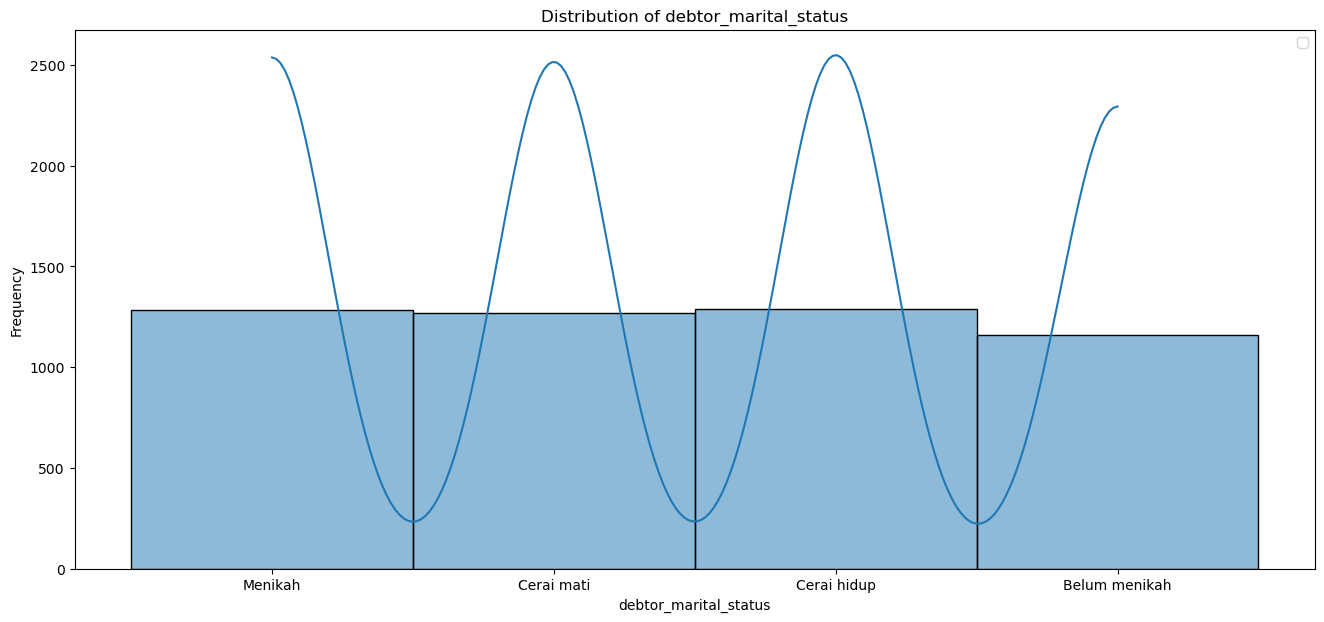

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


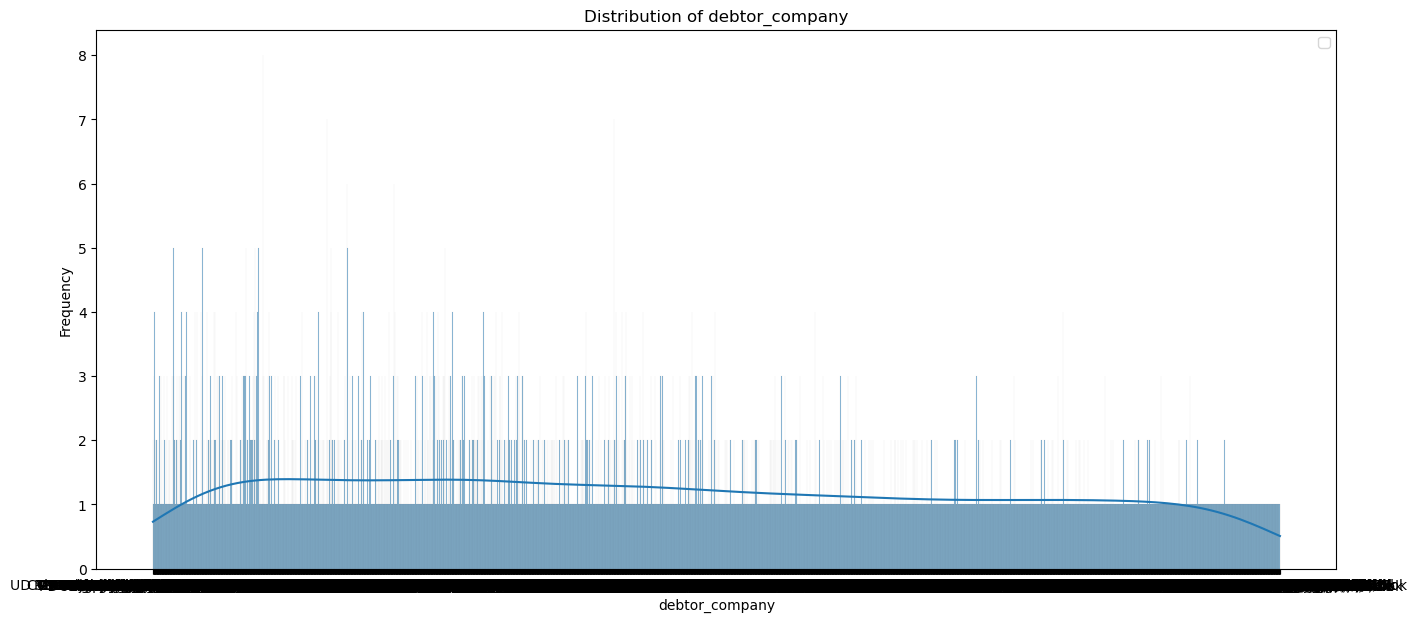

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


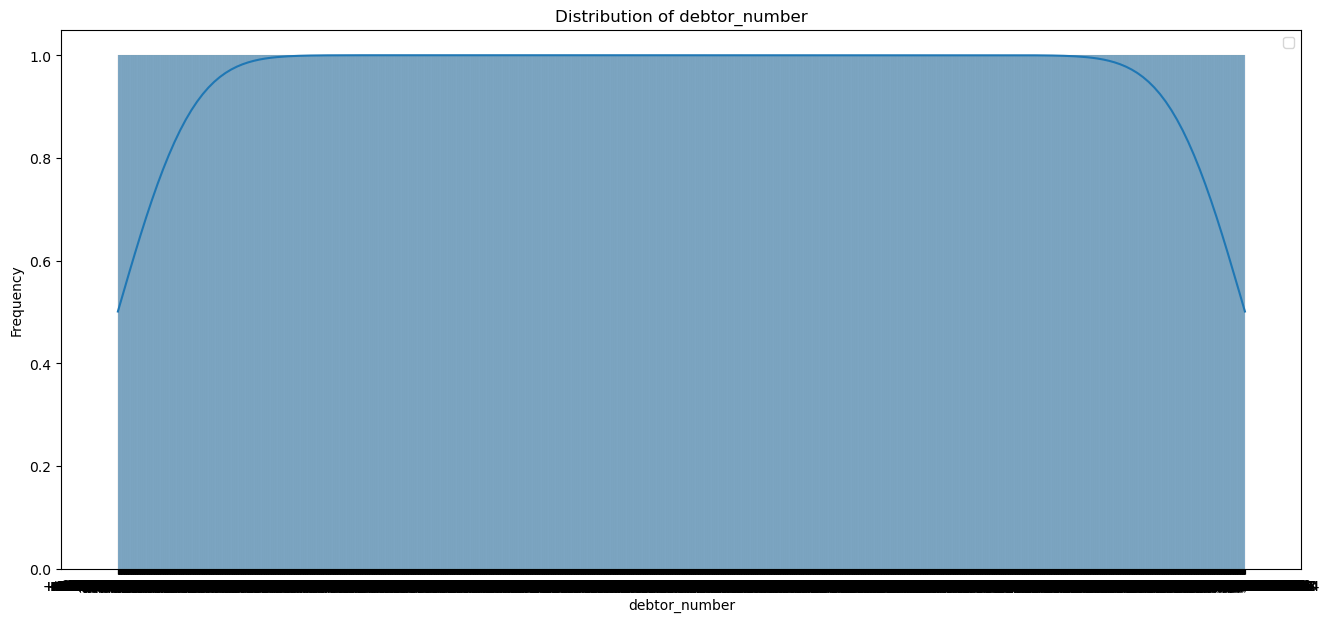

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


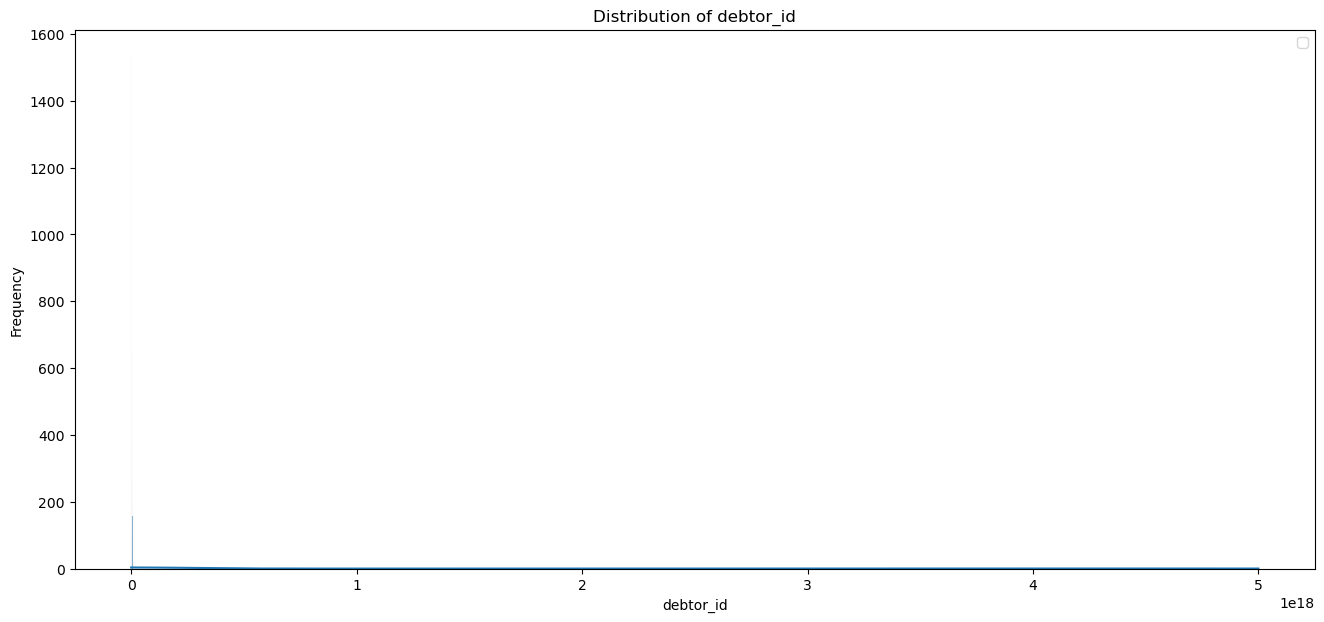

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


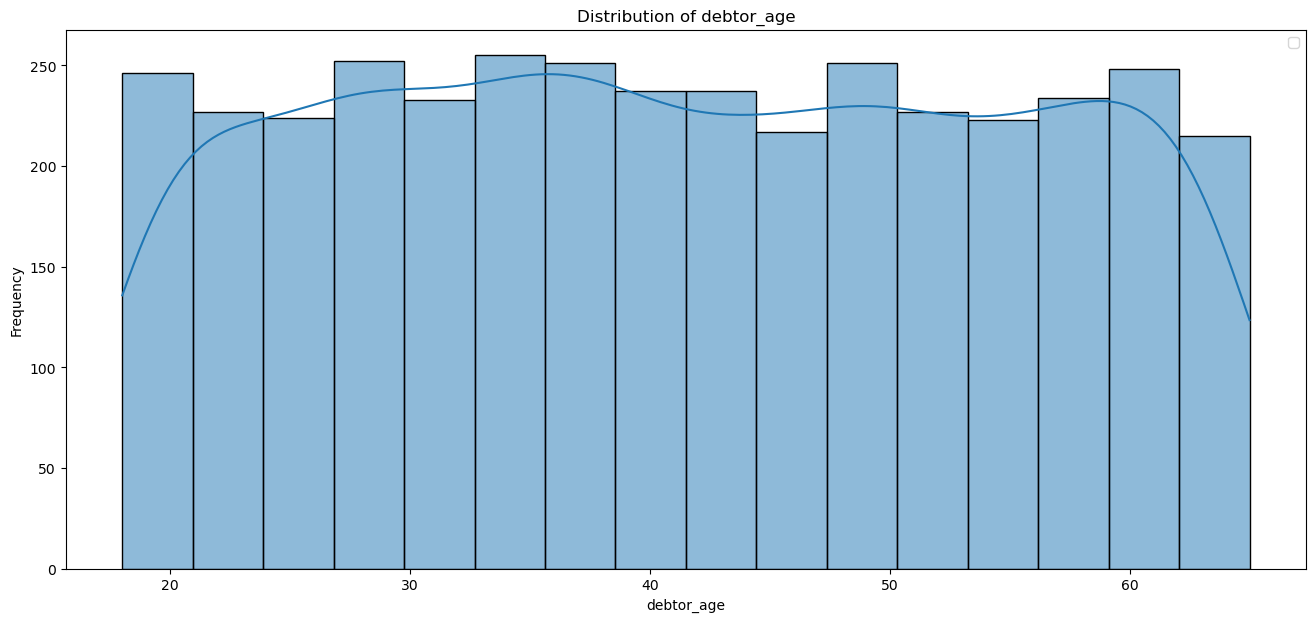

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


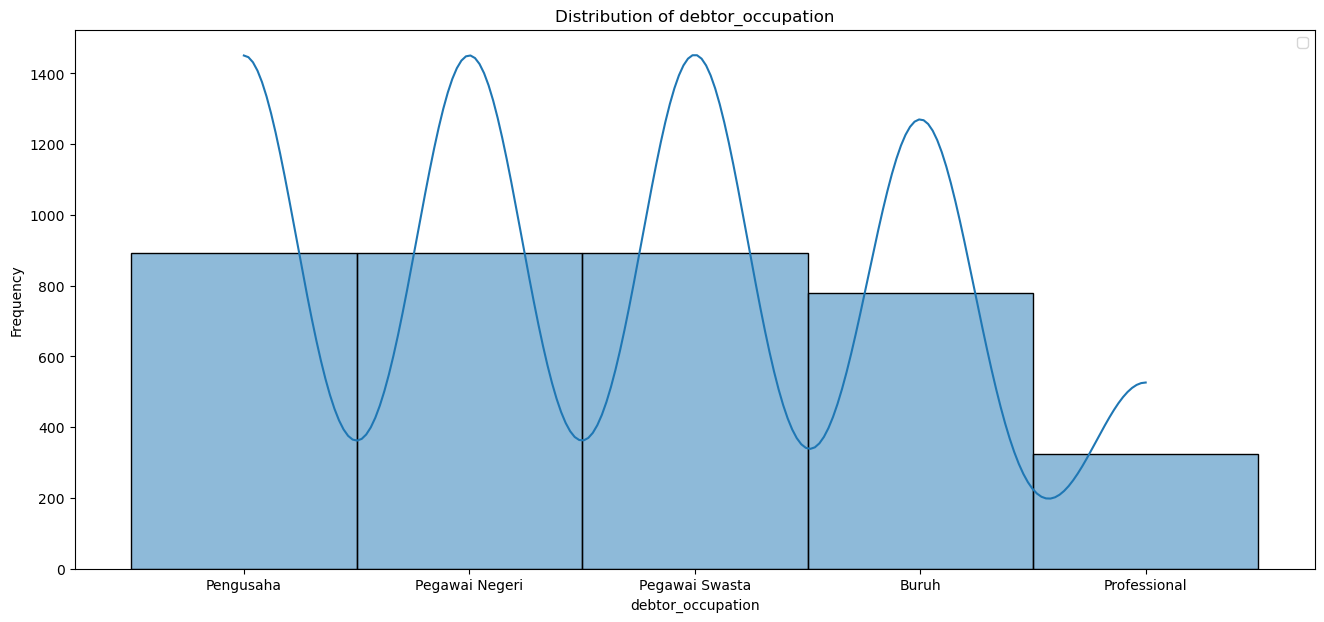

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


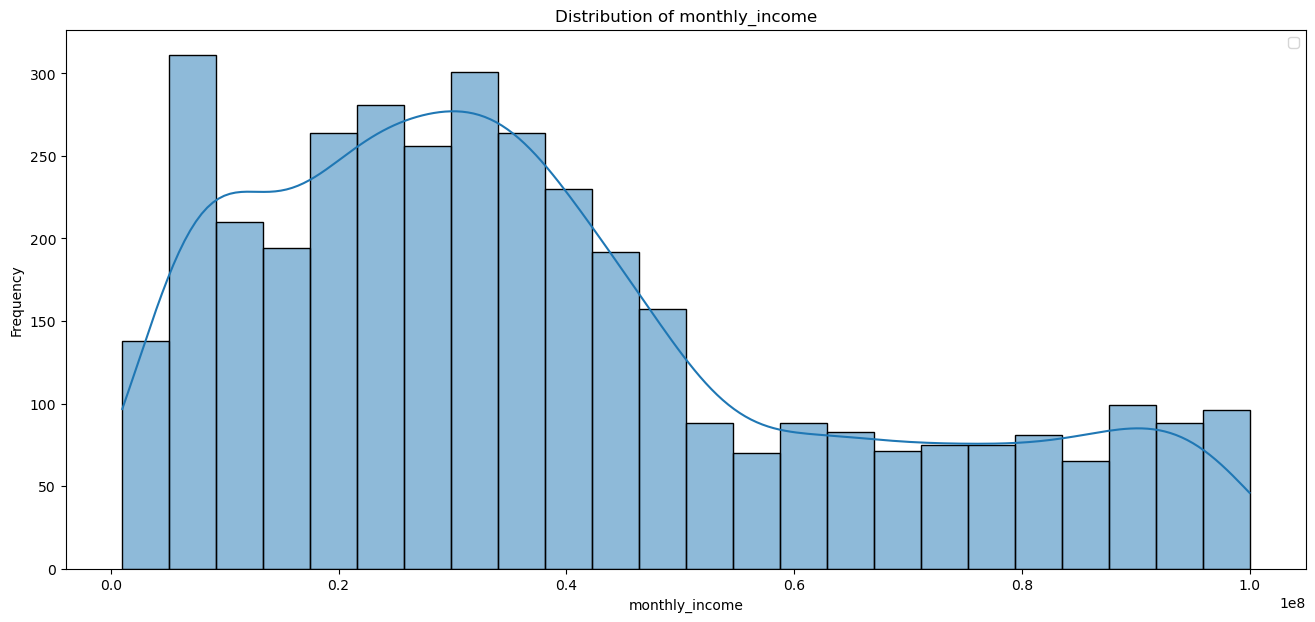

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


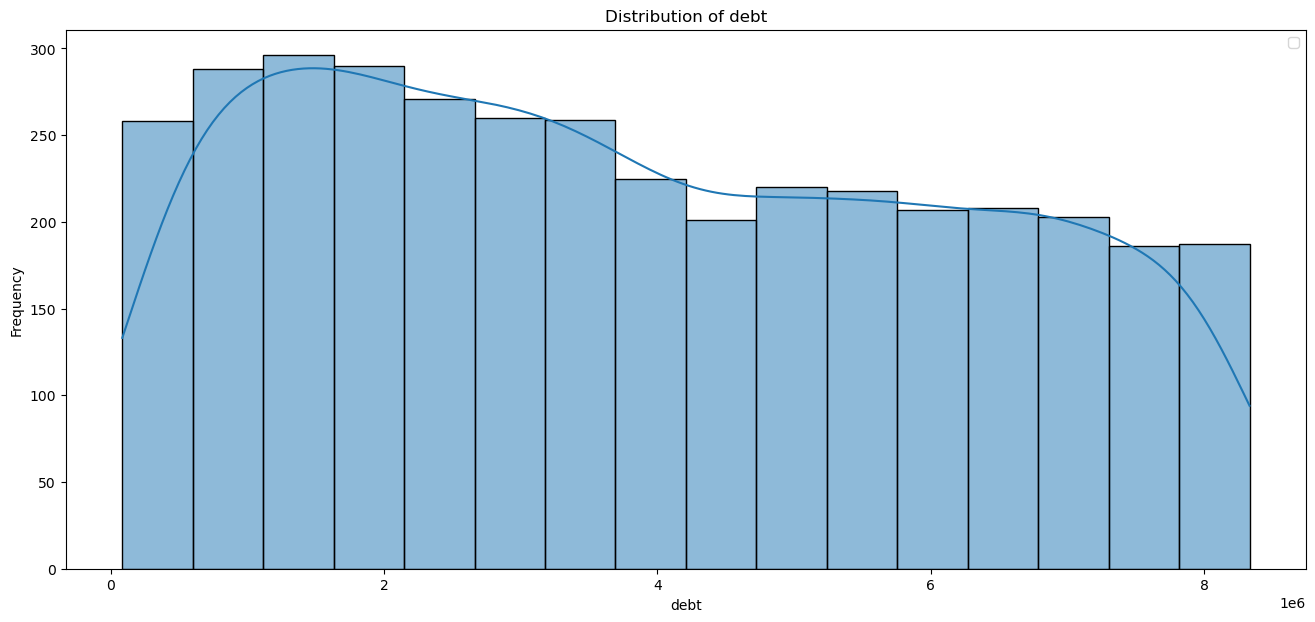

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


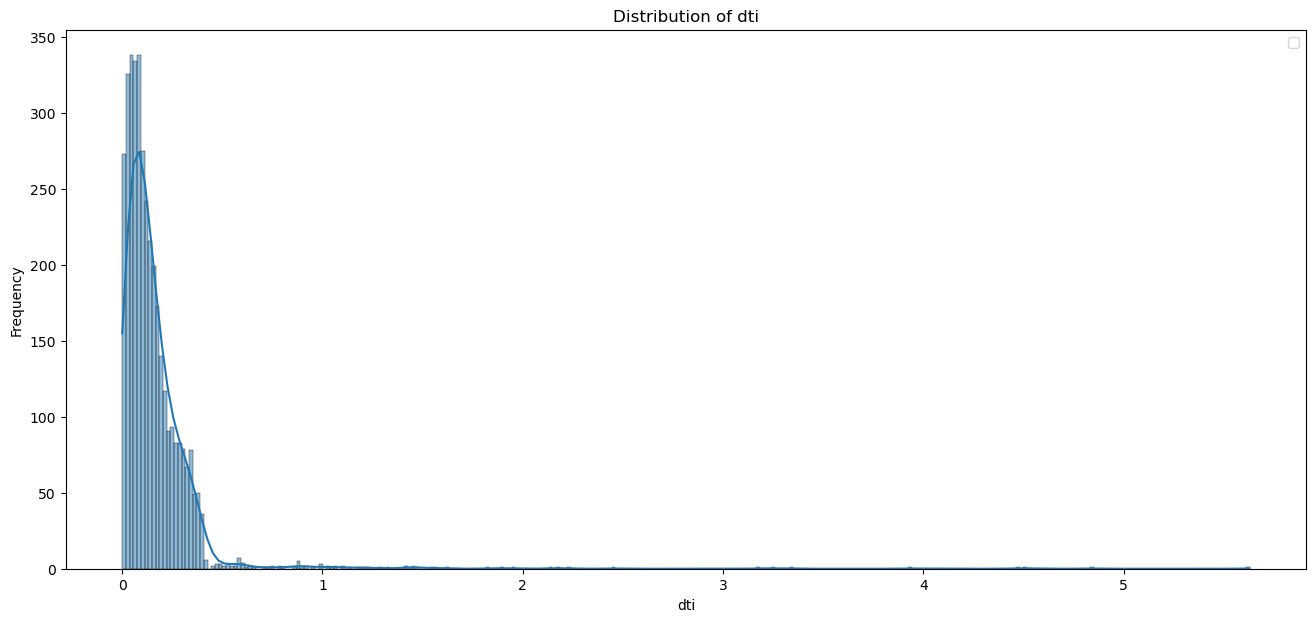

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


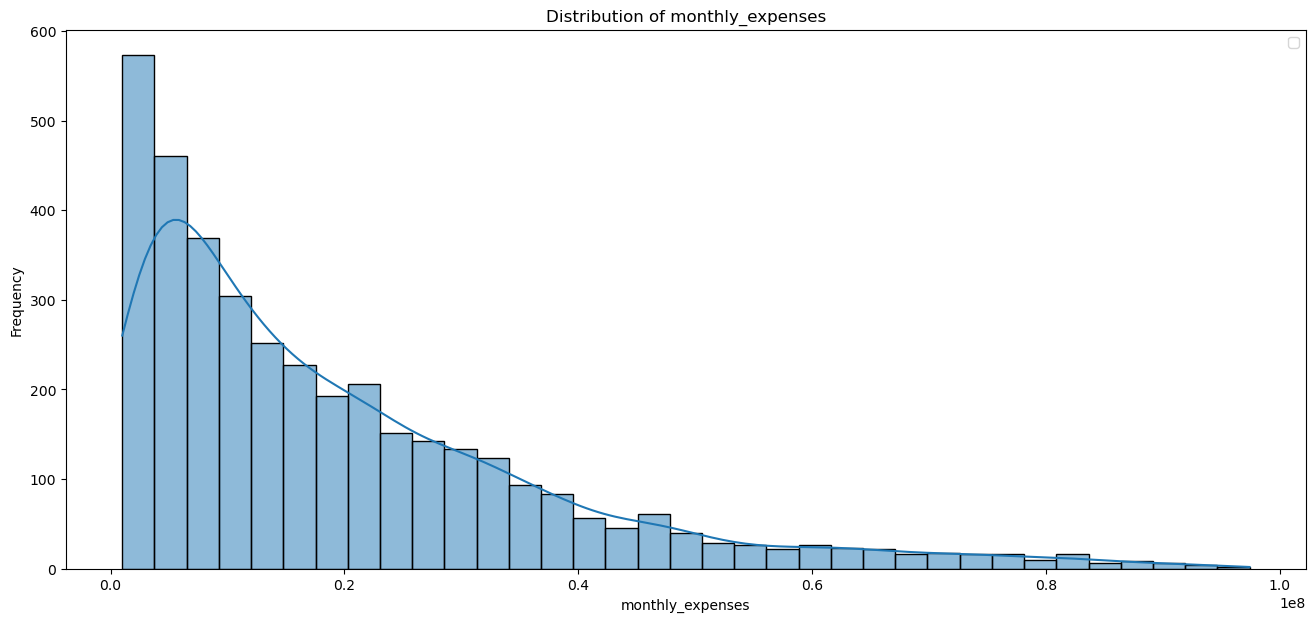

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


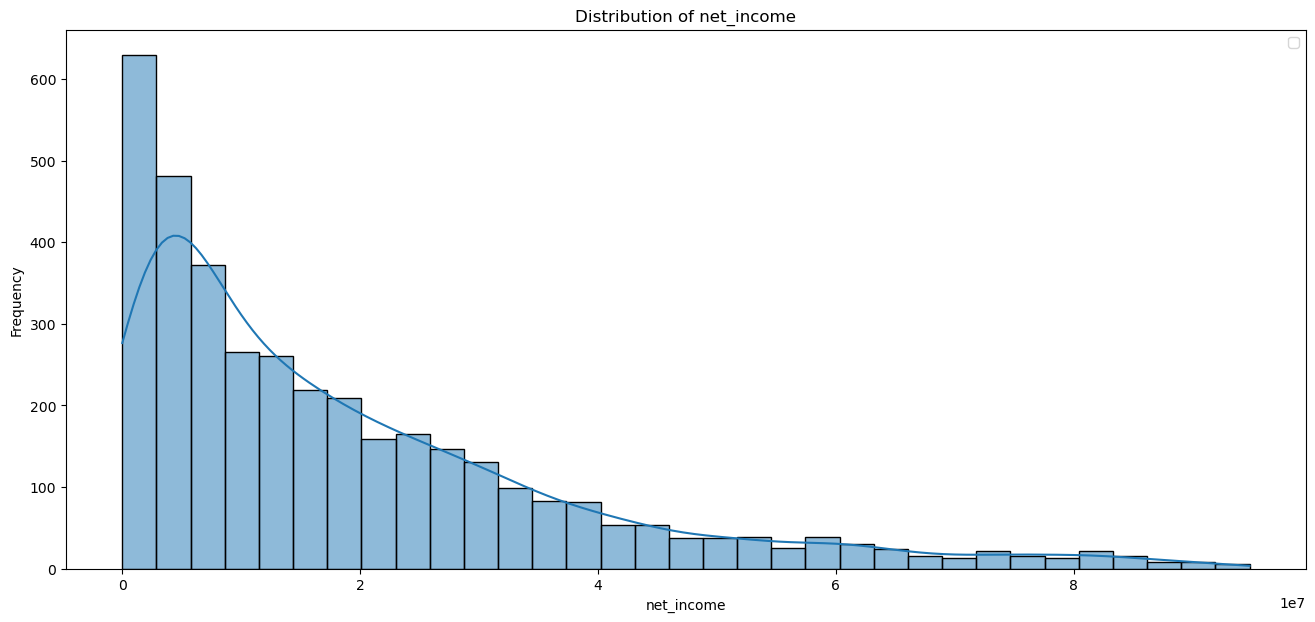

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


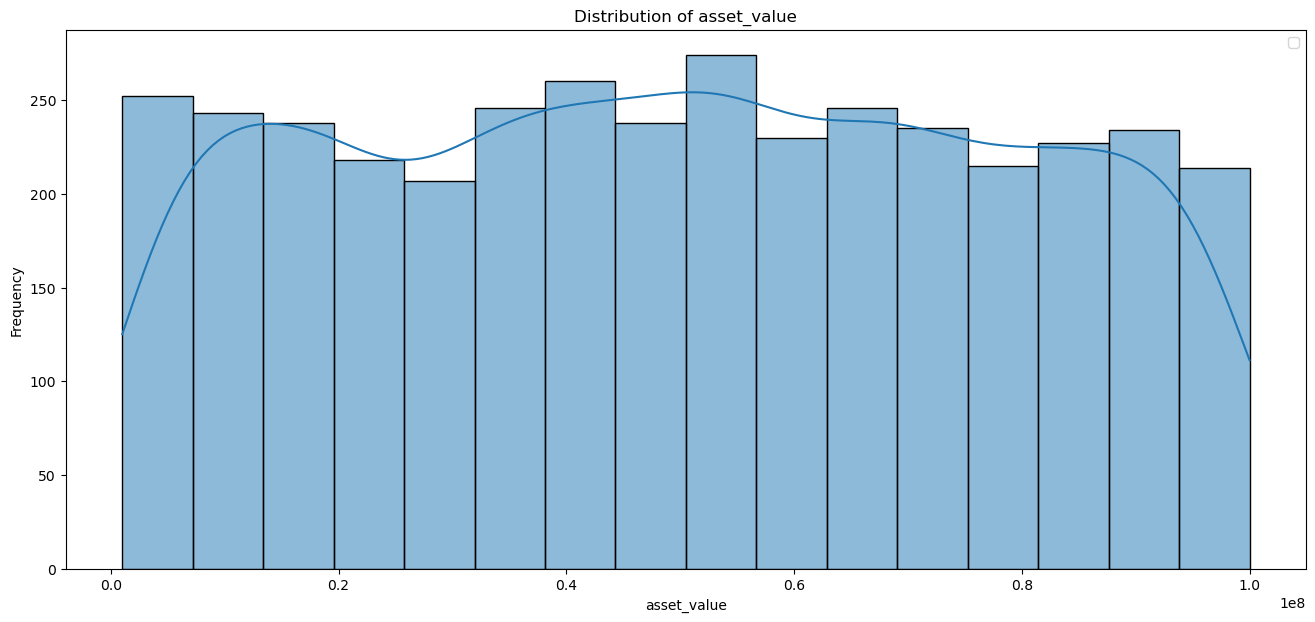

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


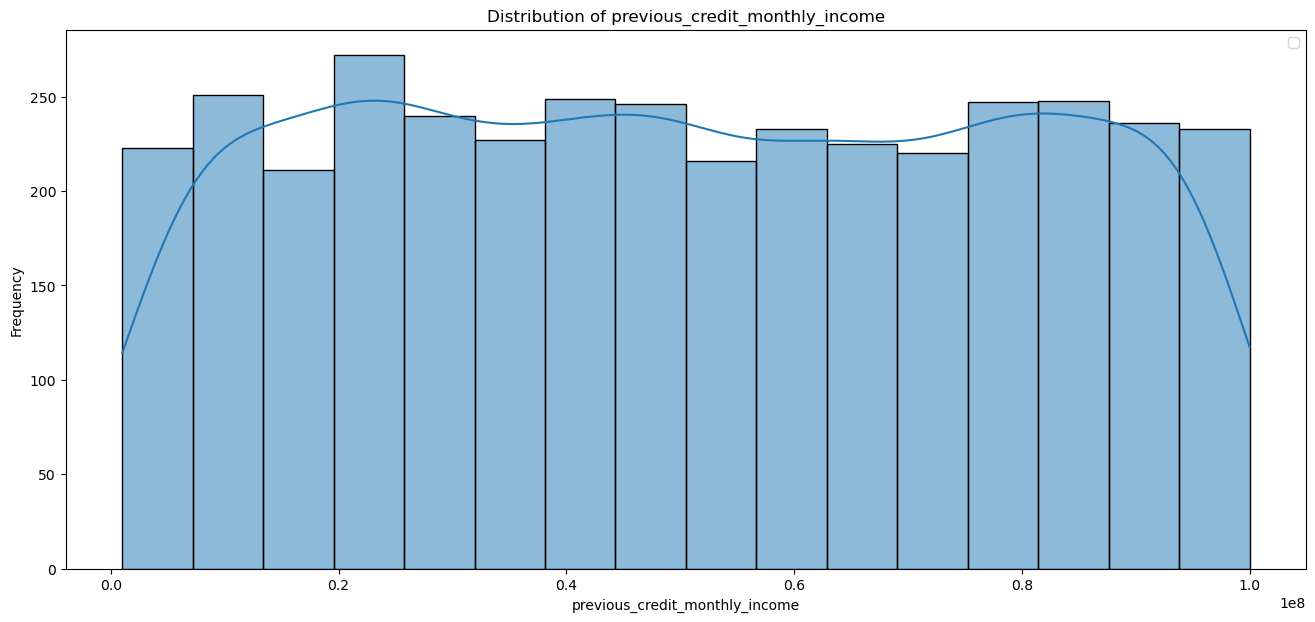

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


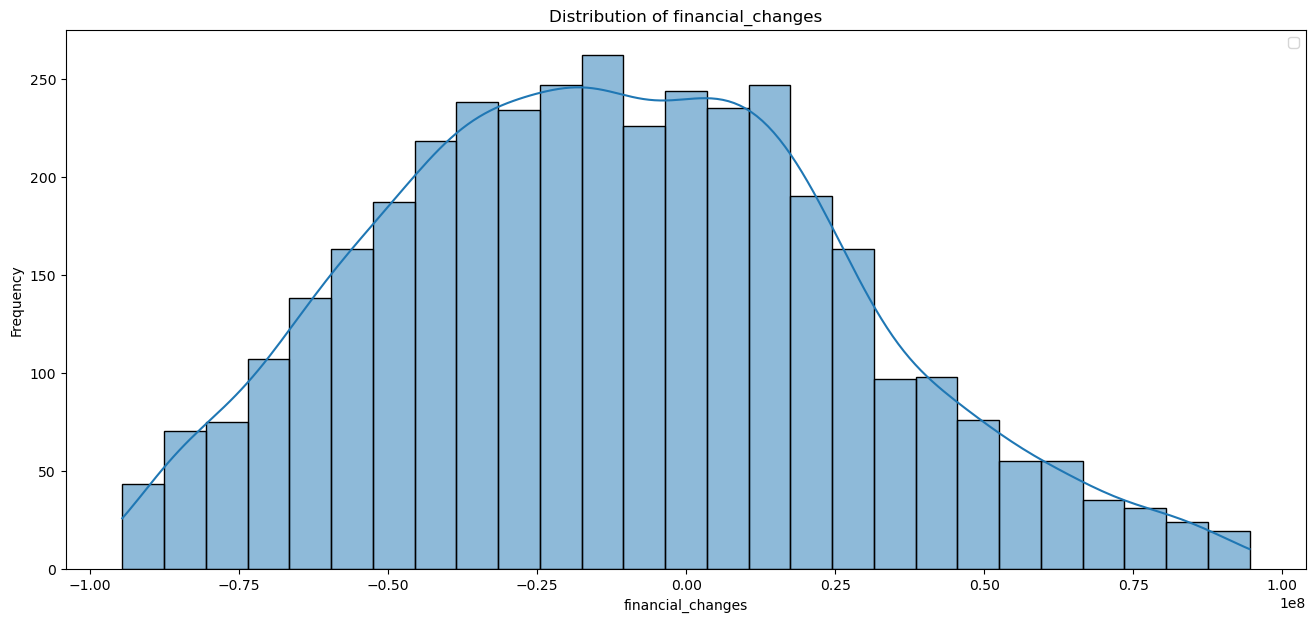

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


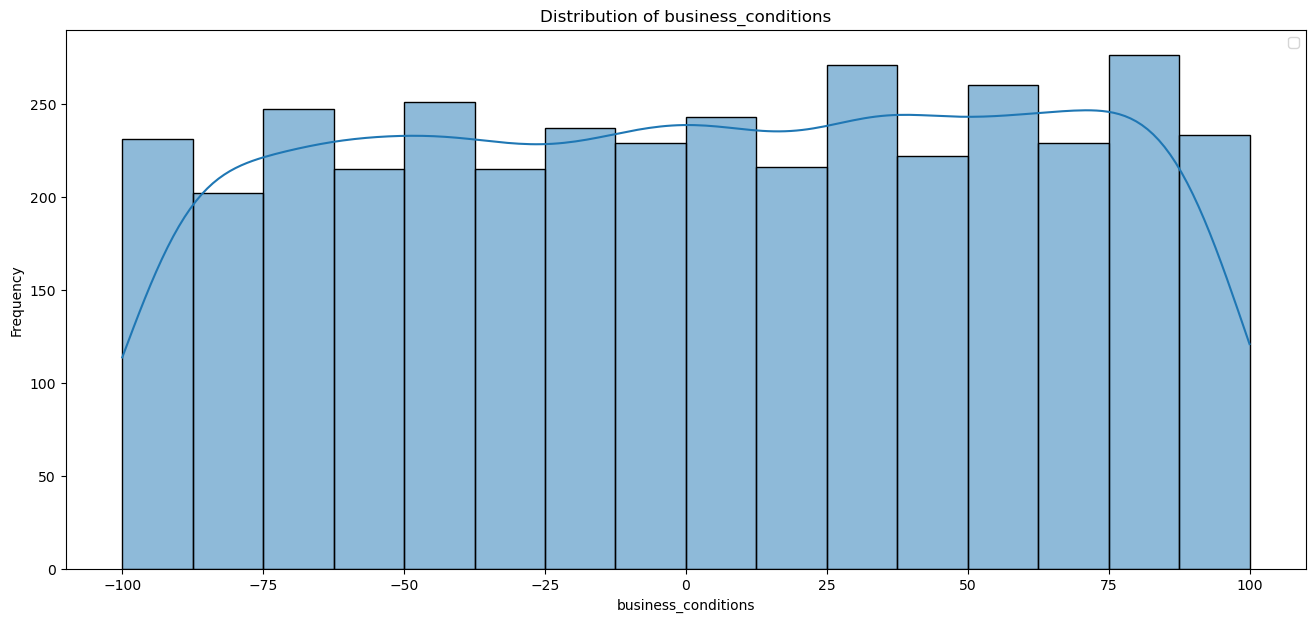

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


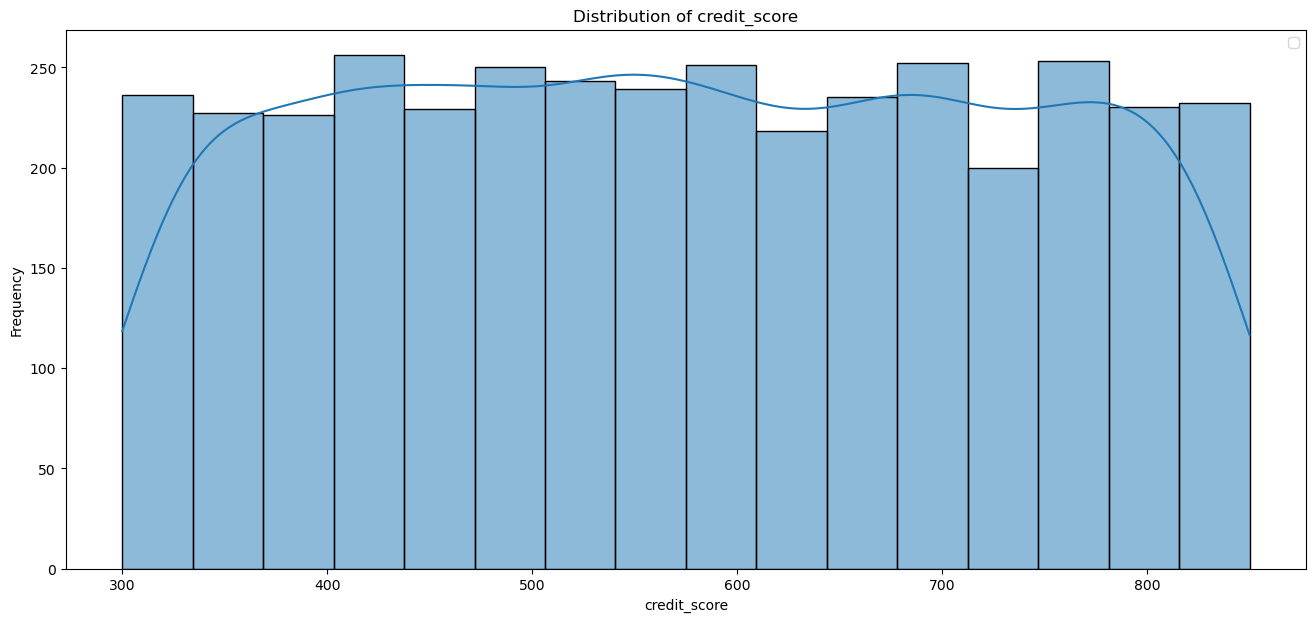

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


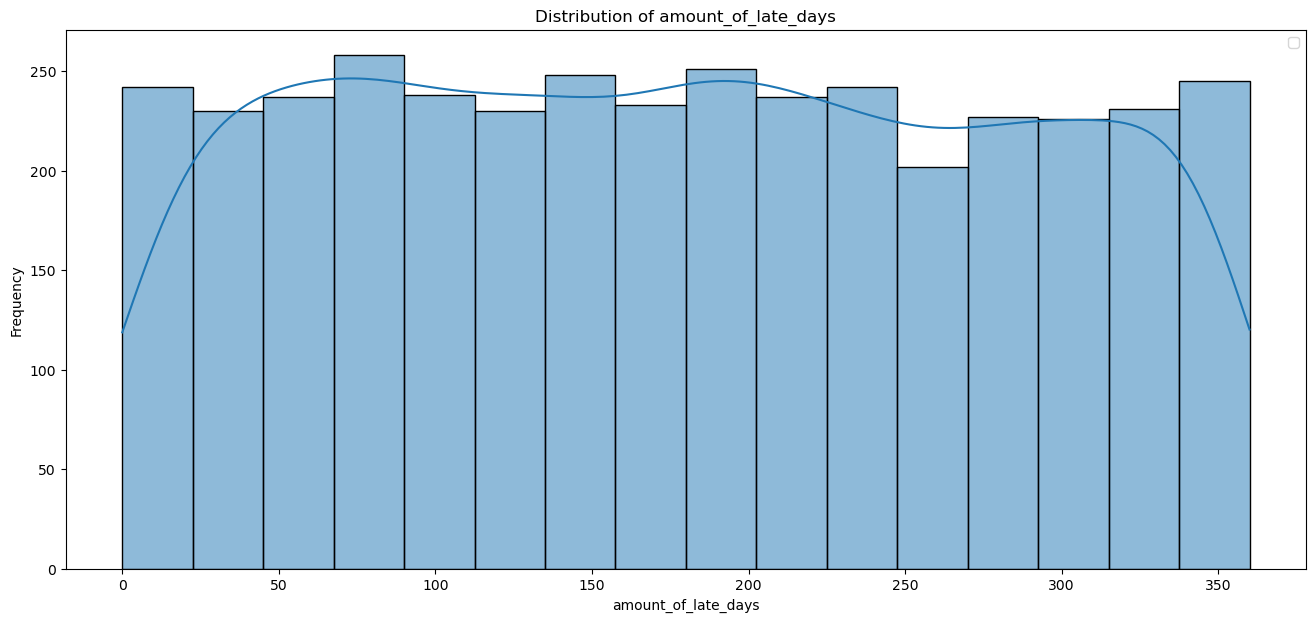

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


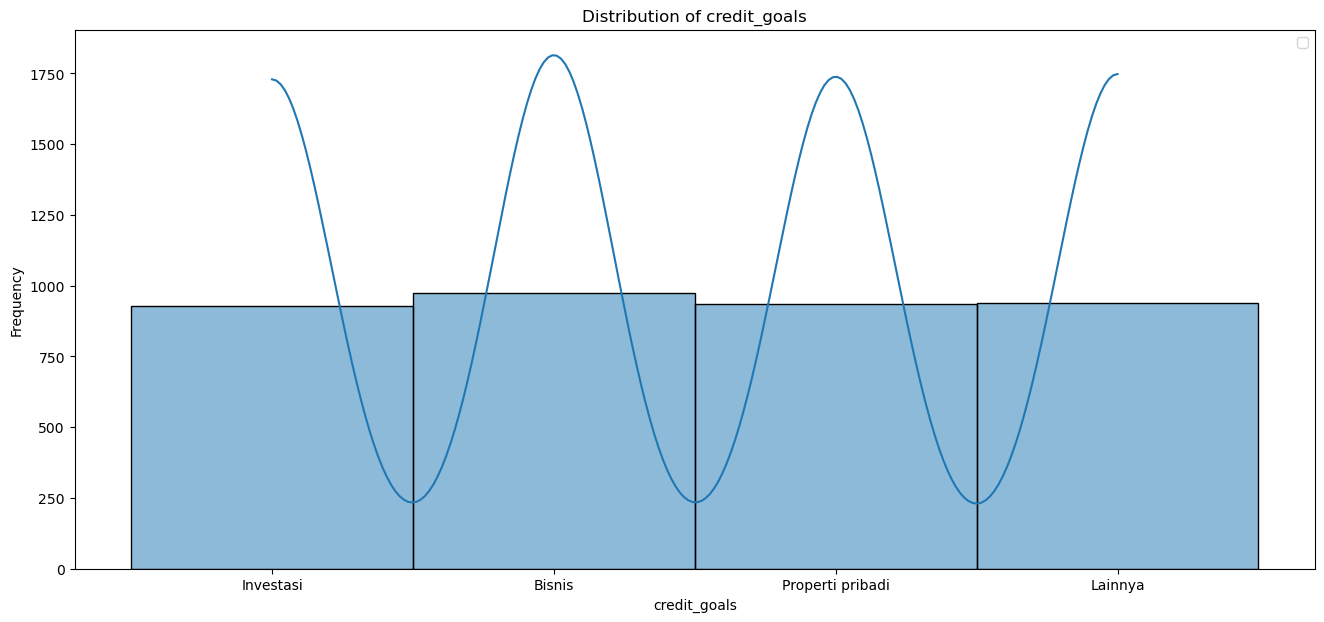

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


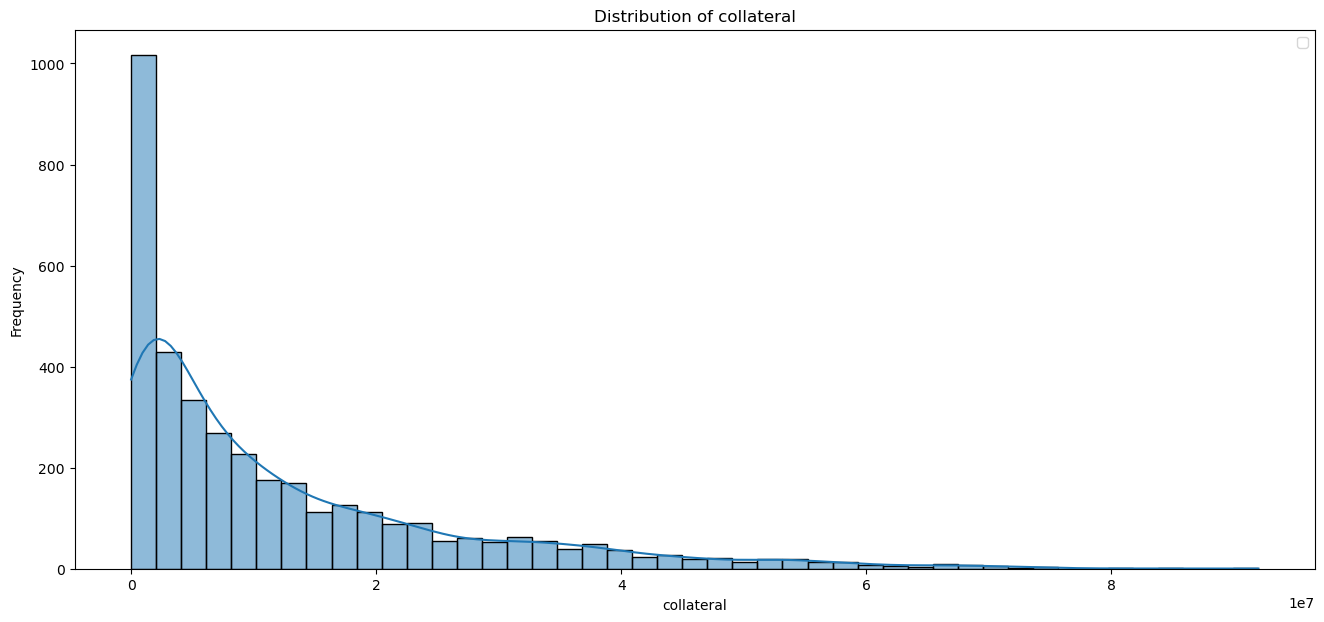

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


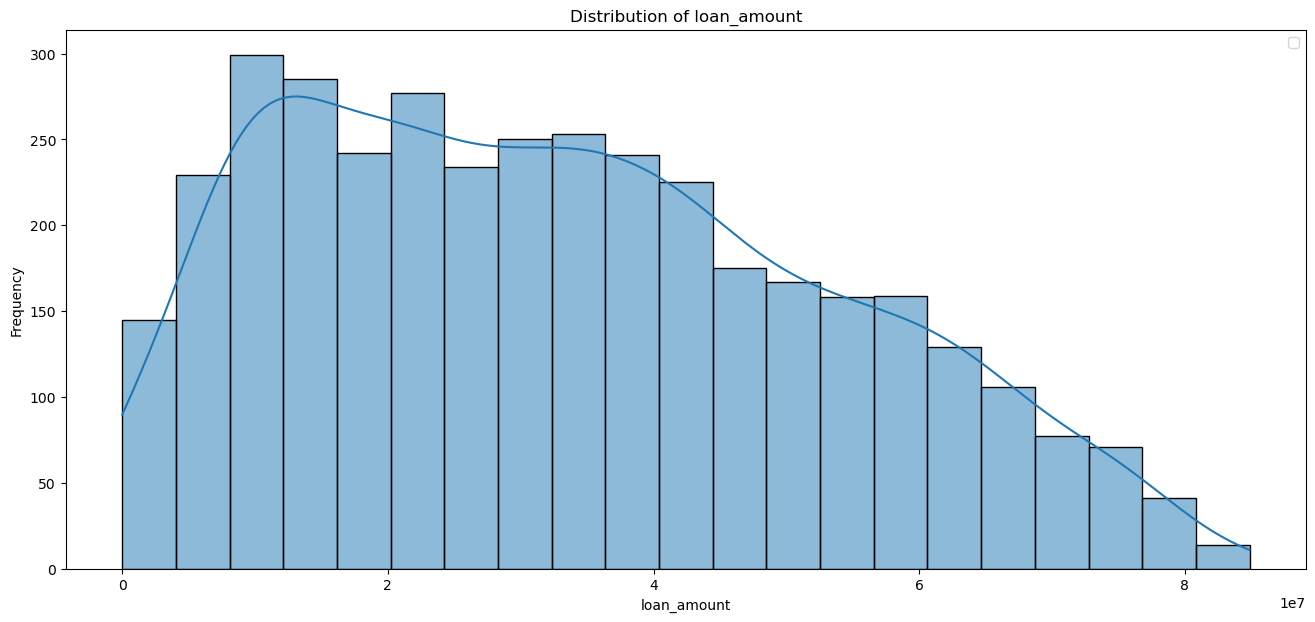

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


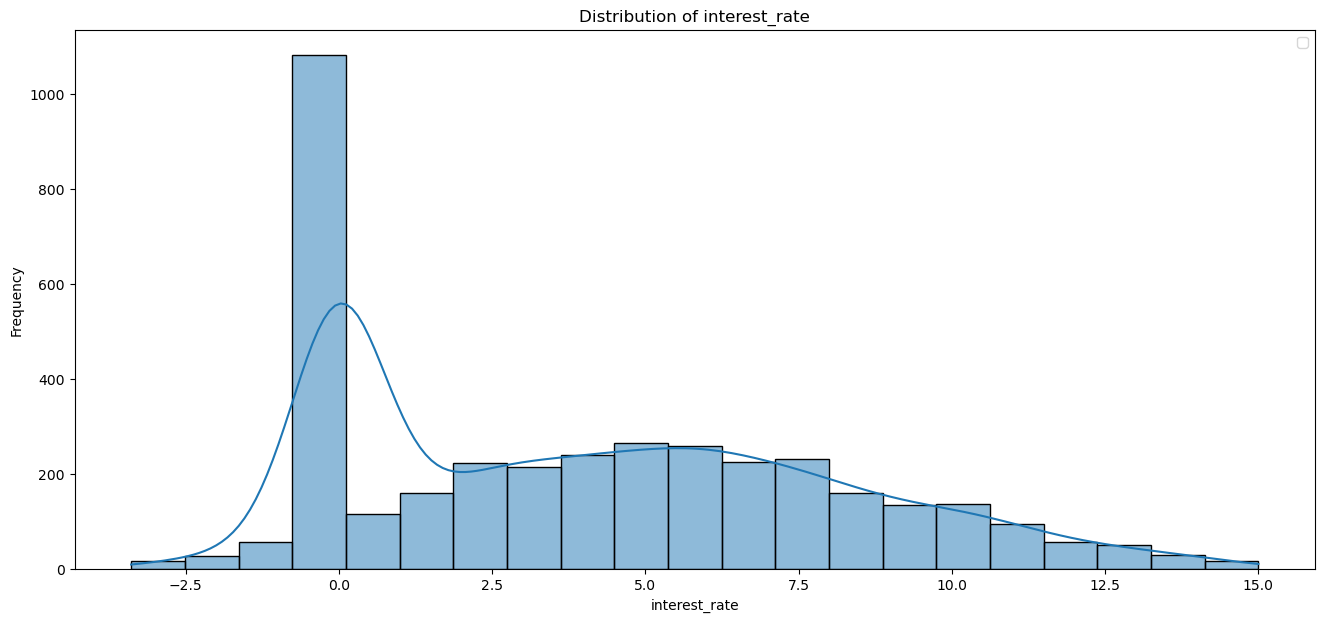

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


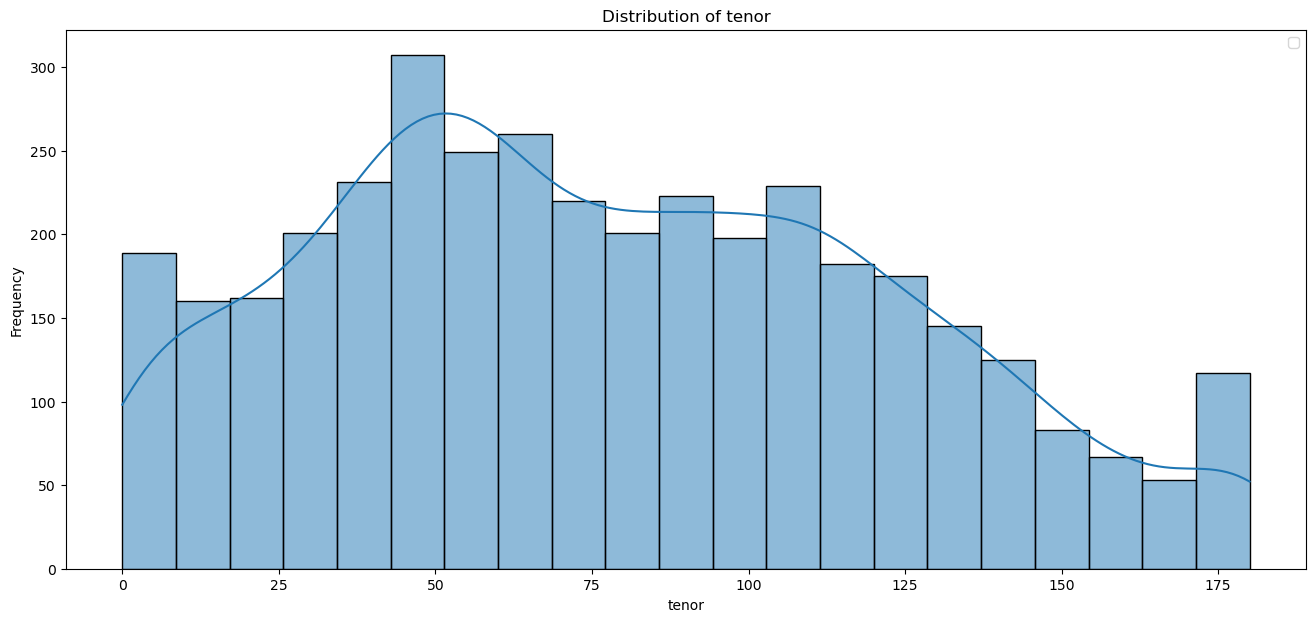

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


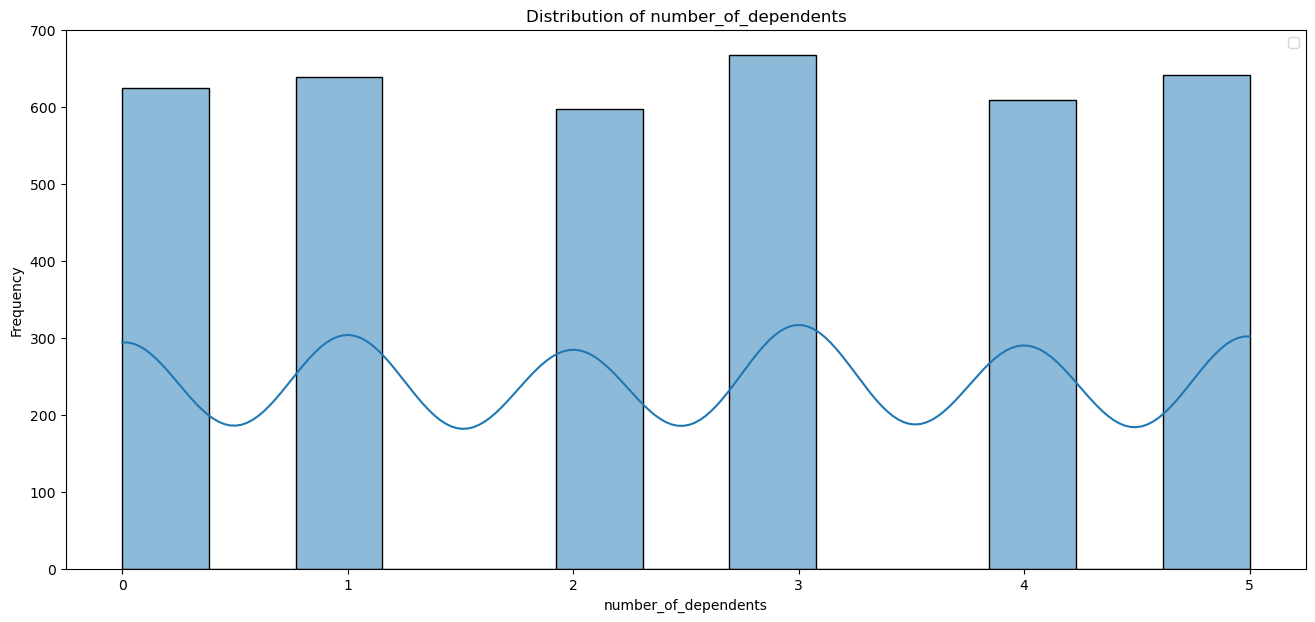

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


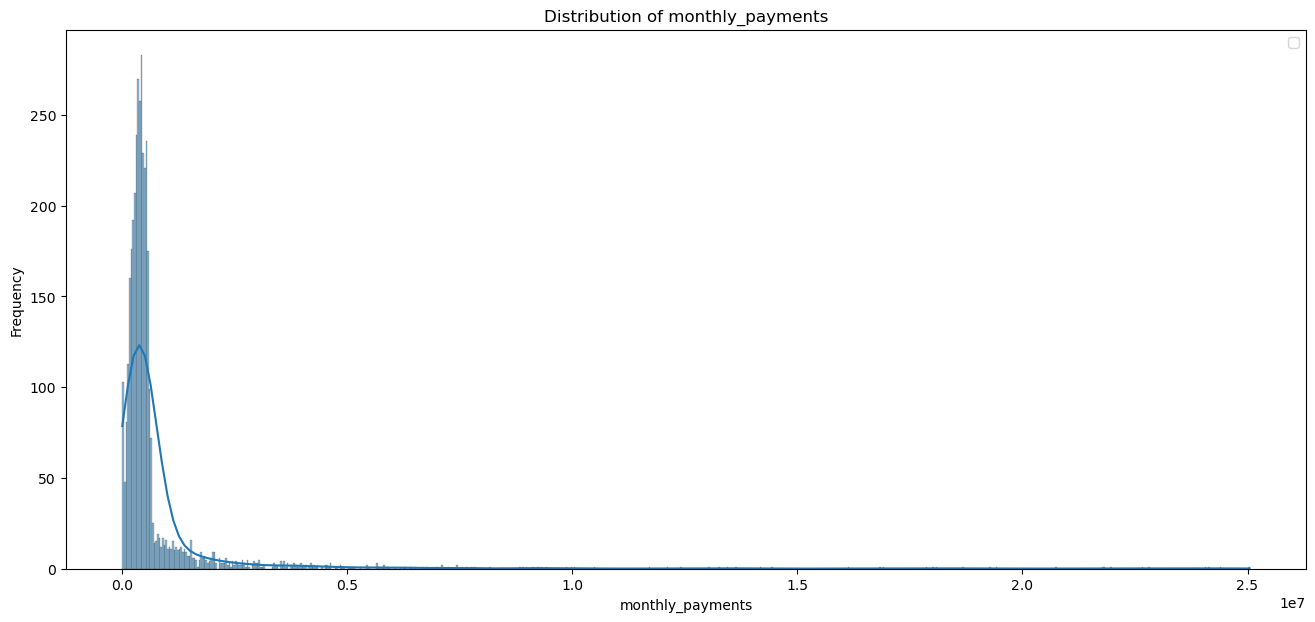

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


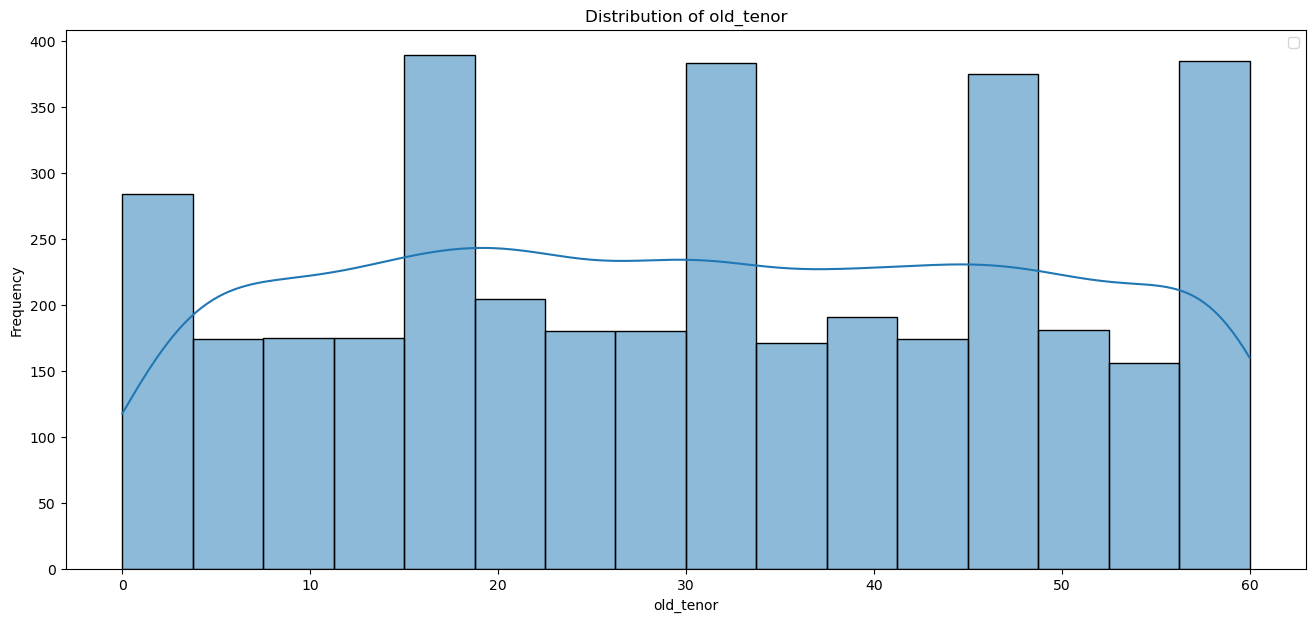

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


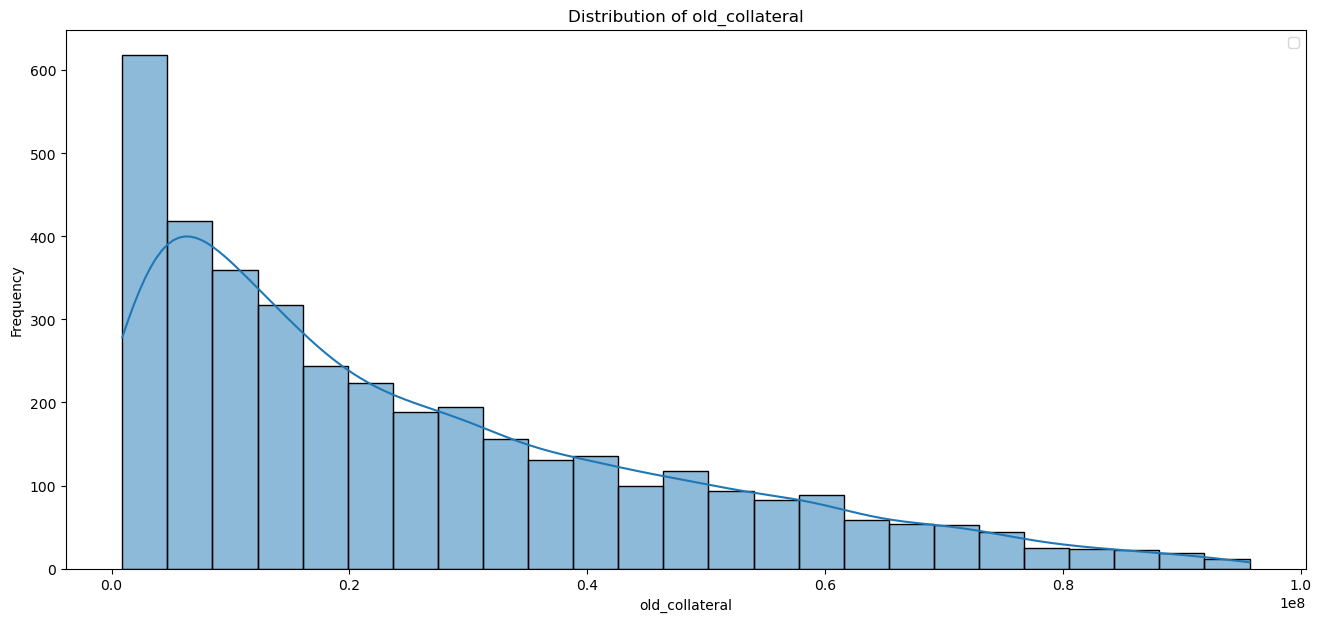

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


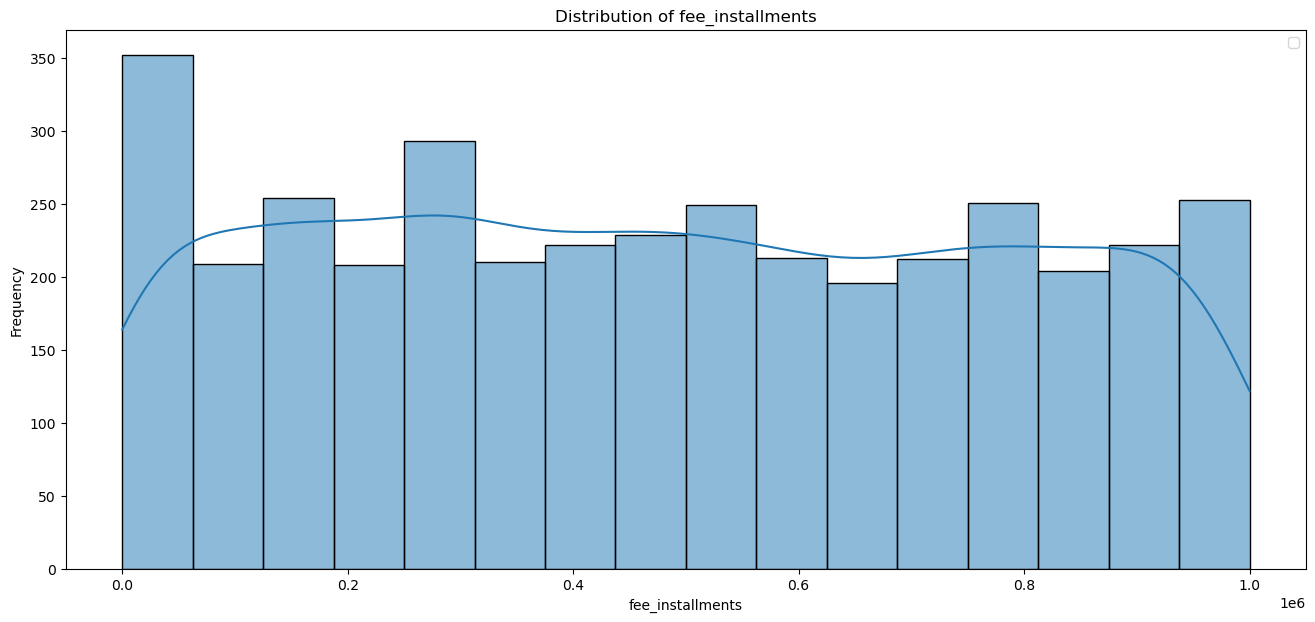

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


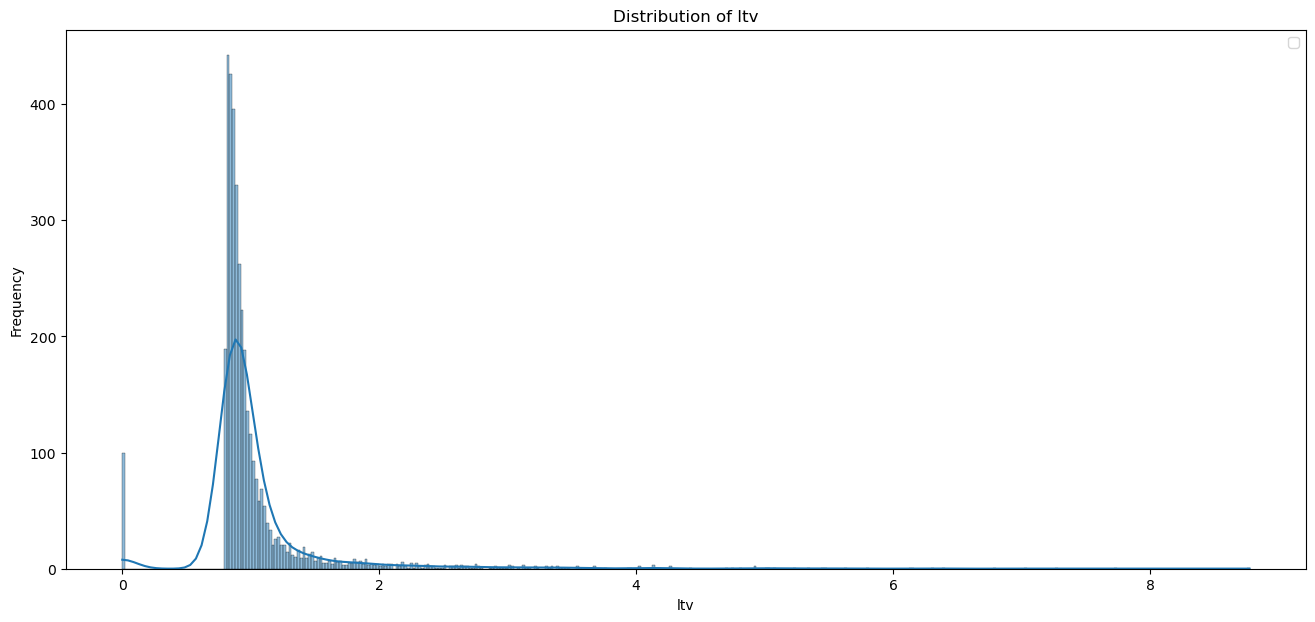

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


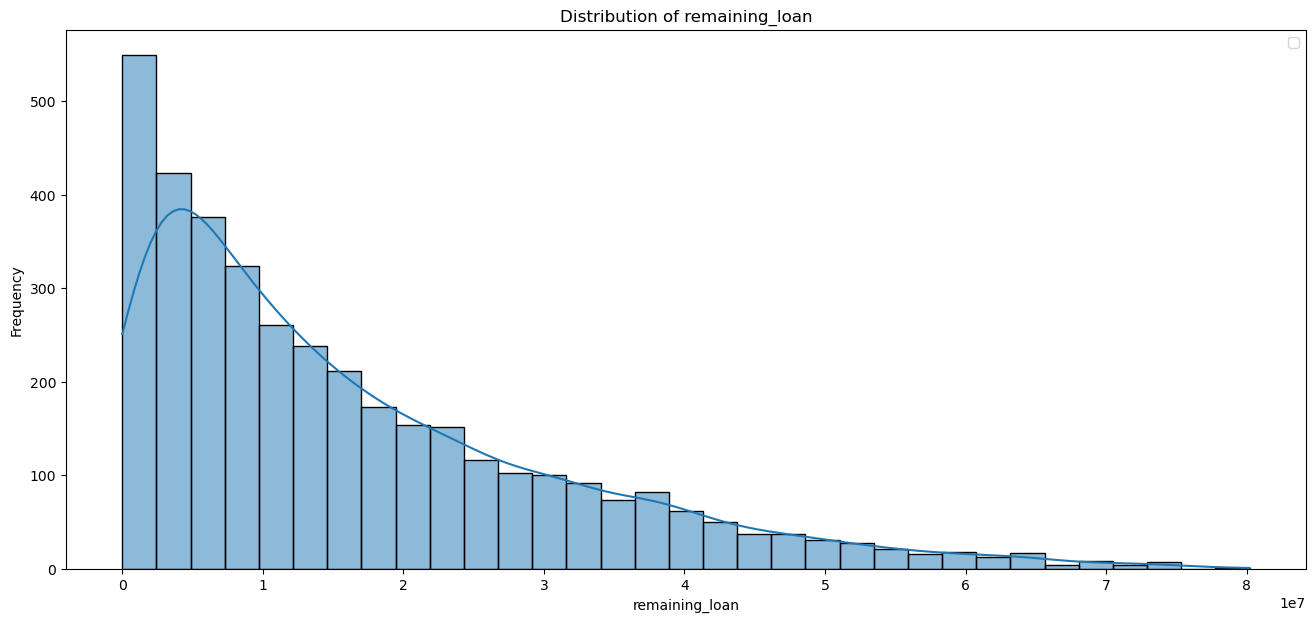

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


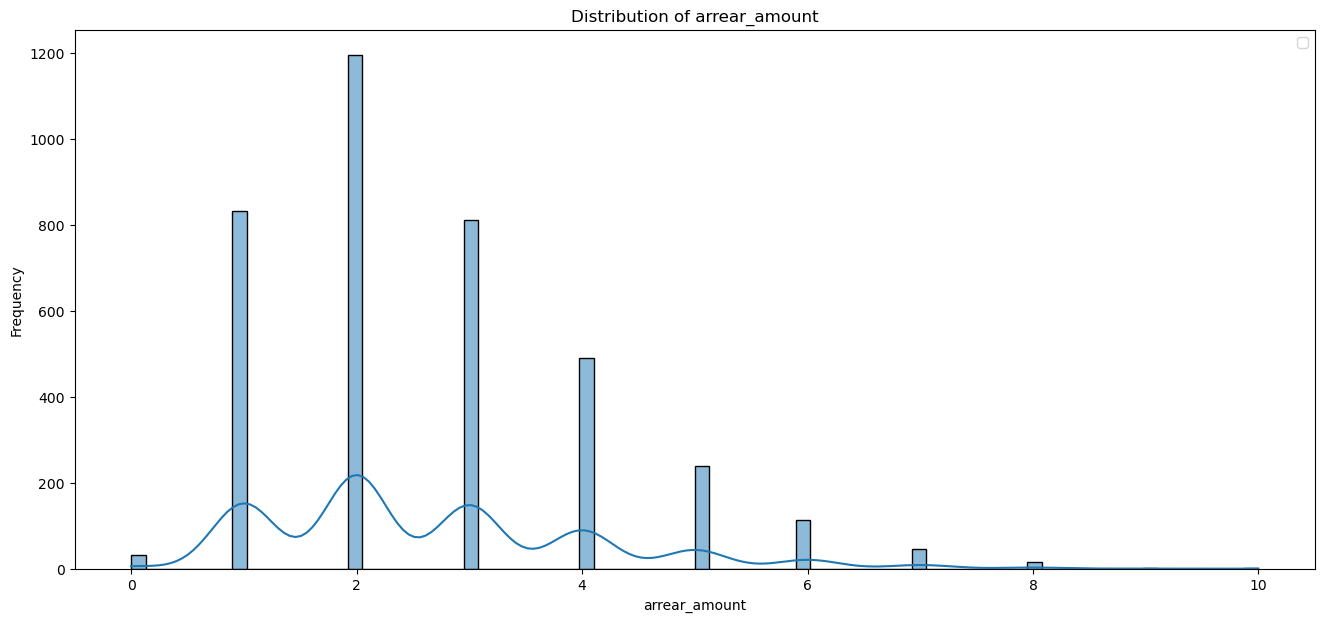

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


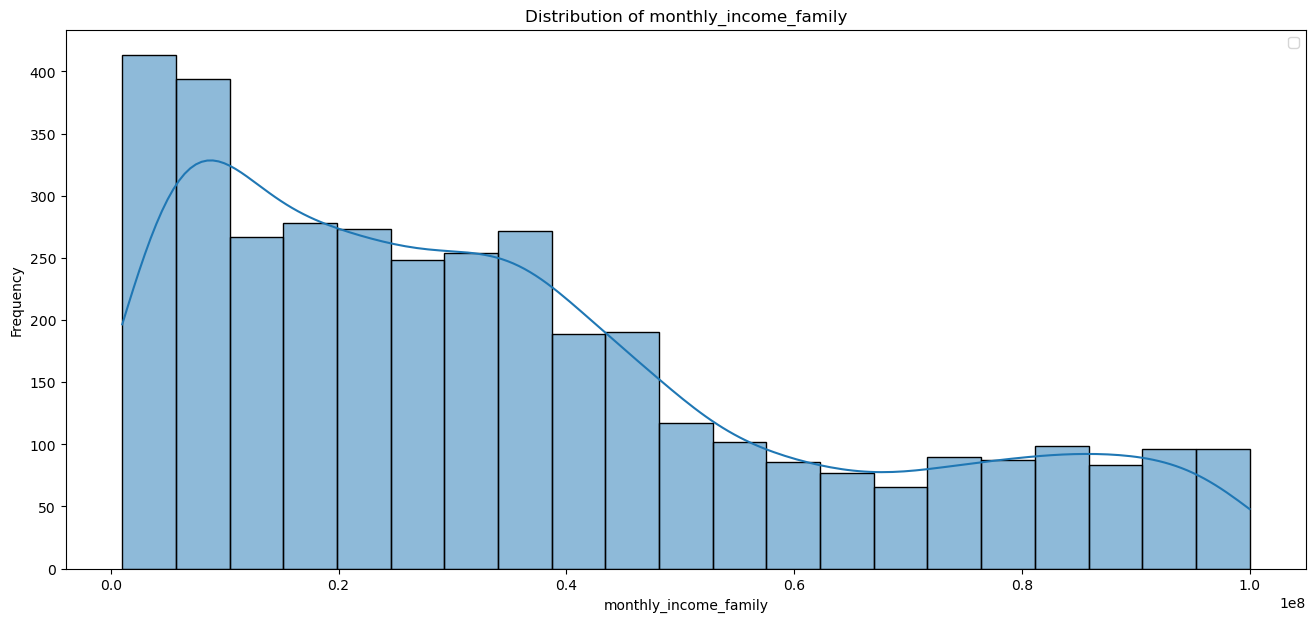

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


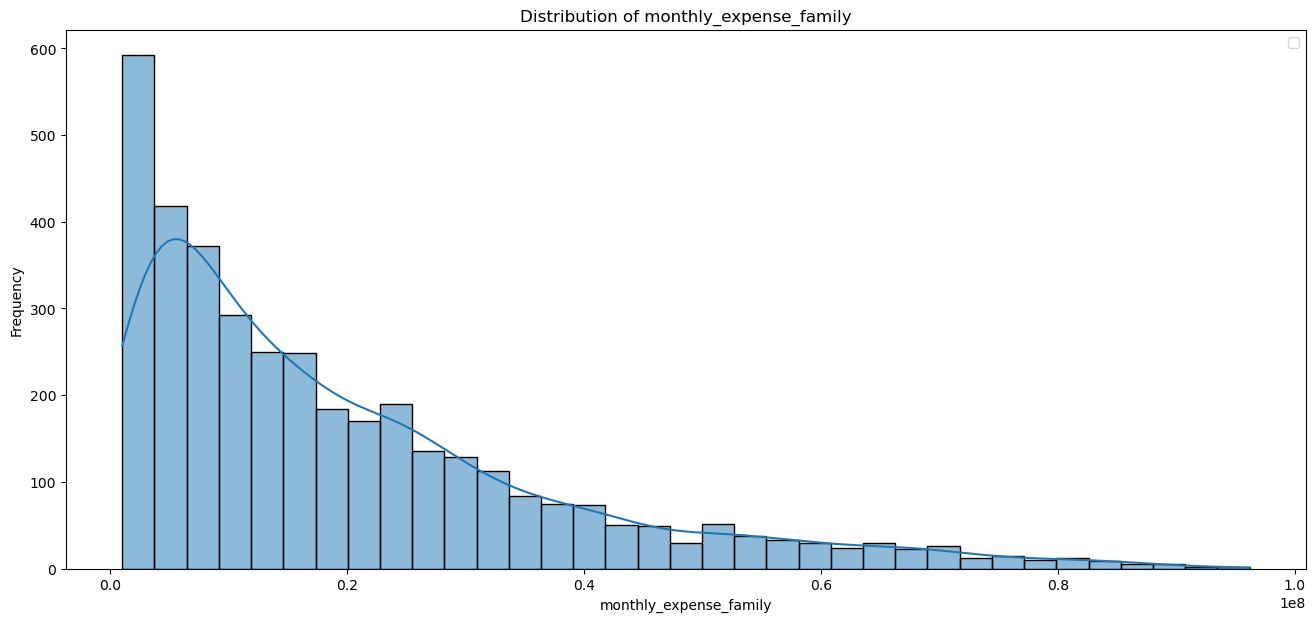

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


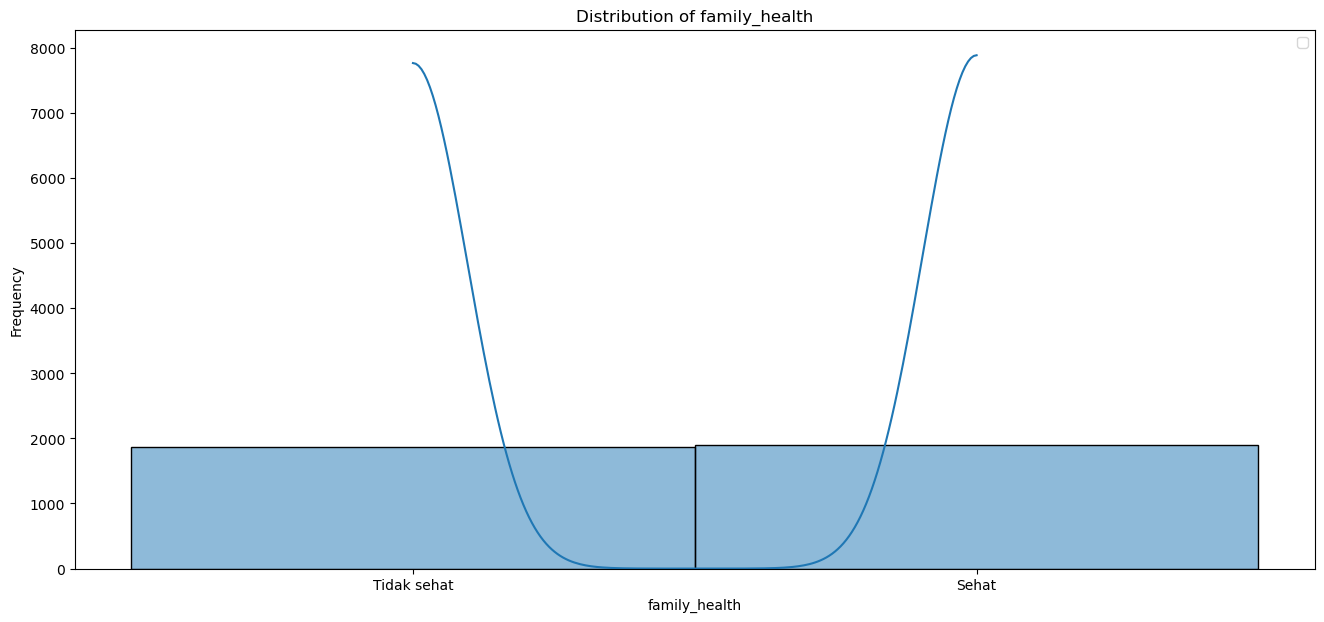

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


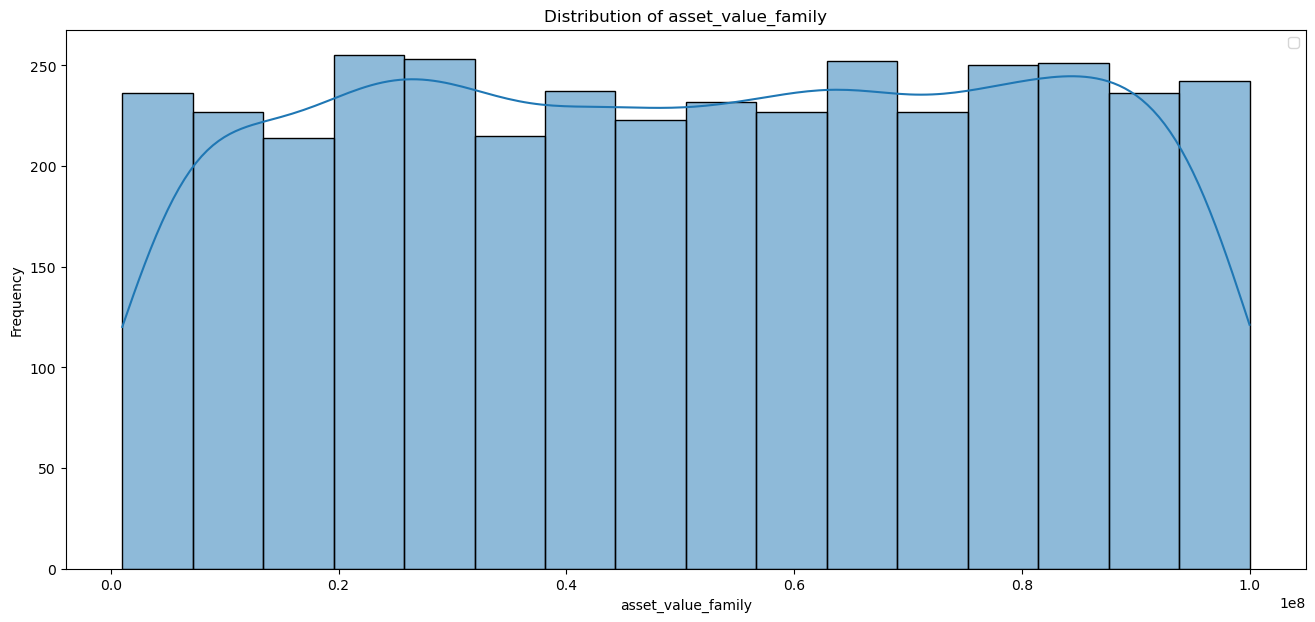

In [9]:
for column in df.columns:
    plt.figure(figsize=(16, 7))
    sns.histplot(df[column], kde=True)# label = 'Skewness: %.2f'%(df[column].skew()))
    plt.title(f'Distribution of {column}')
    plt.legend(loc = 'best')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [10]:
df.isnull().sum() #checking for total null values

debtor_nik                           0
debtor_name                          0
debtor_gender                        0
debtor_birth_place                   0
debtor_address                       0
debtor_zip                           0
debtor_rt                            0
debtor_rw                            0
debtor_marital_status                0
debtor_company                       0
debtor_number                        0
debtor_id                         1223
debtor_age                        1223
debtor_occupation                 1223
monthly_income                    1223
debt                              1223
dti                               1223
monthly_expenses                  1223
net_income                        1223
asset_value                       1223
previous_credit_monthly_income    1223
financial_changes                 1223
business_conditions               1223
credit_score                      1223
amount_of_late_days               1223
credit_goals             

No Missing Value tidak perlu melakukan Imputasi dan lainnya



### Korelasi pekerjaan dan gaji

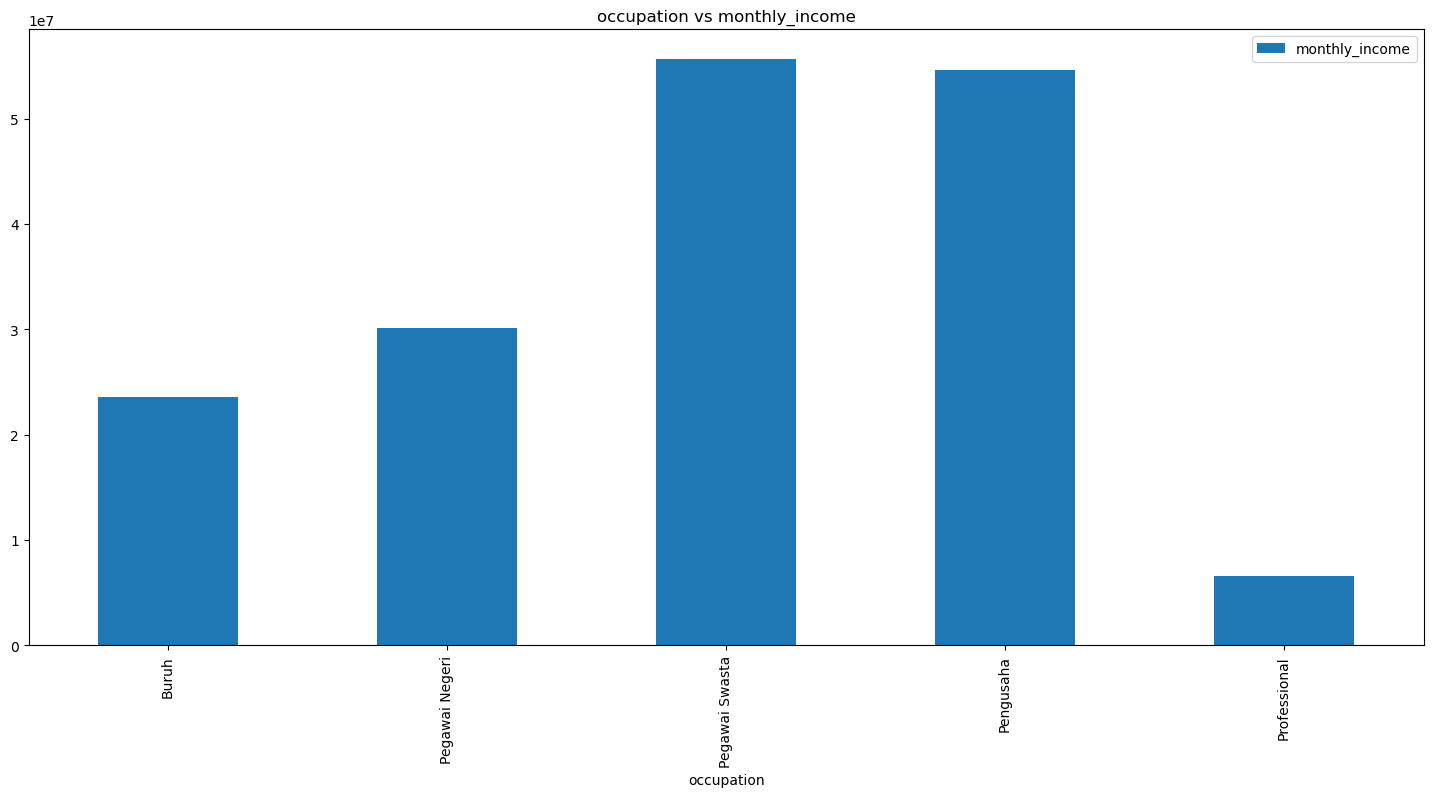

In [11]:
f, ax = plt.subplots(figsize=(18, 8))

# Bar plot for mean monthly income based on type of job
df[['occupation', 'monthly_income']].groupby(['occupation']).mean().plot.bar(ax=ax)
ax.set_title('occupation vs monthly_income')

plt.show()


Berdasarkan grafik diatas, Pendapatan rata-rata bulanan Karyawan dan wirausaha cenderung besar, sedangkat ASN dan Wiraswasta sedang dan Pendapatan bulanan Buruh dan investor cenderung kecil

### HeatMap data

C:\Users\User\AppData\Local\Temp\ipykernel_4156\2670240793.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

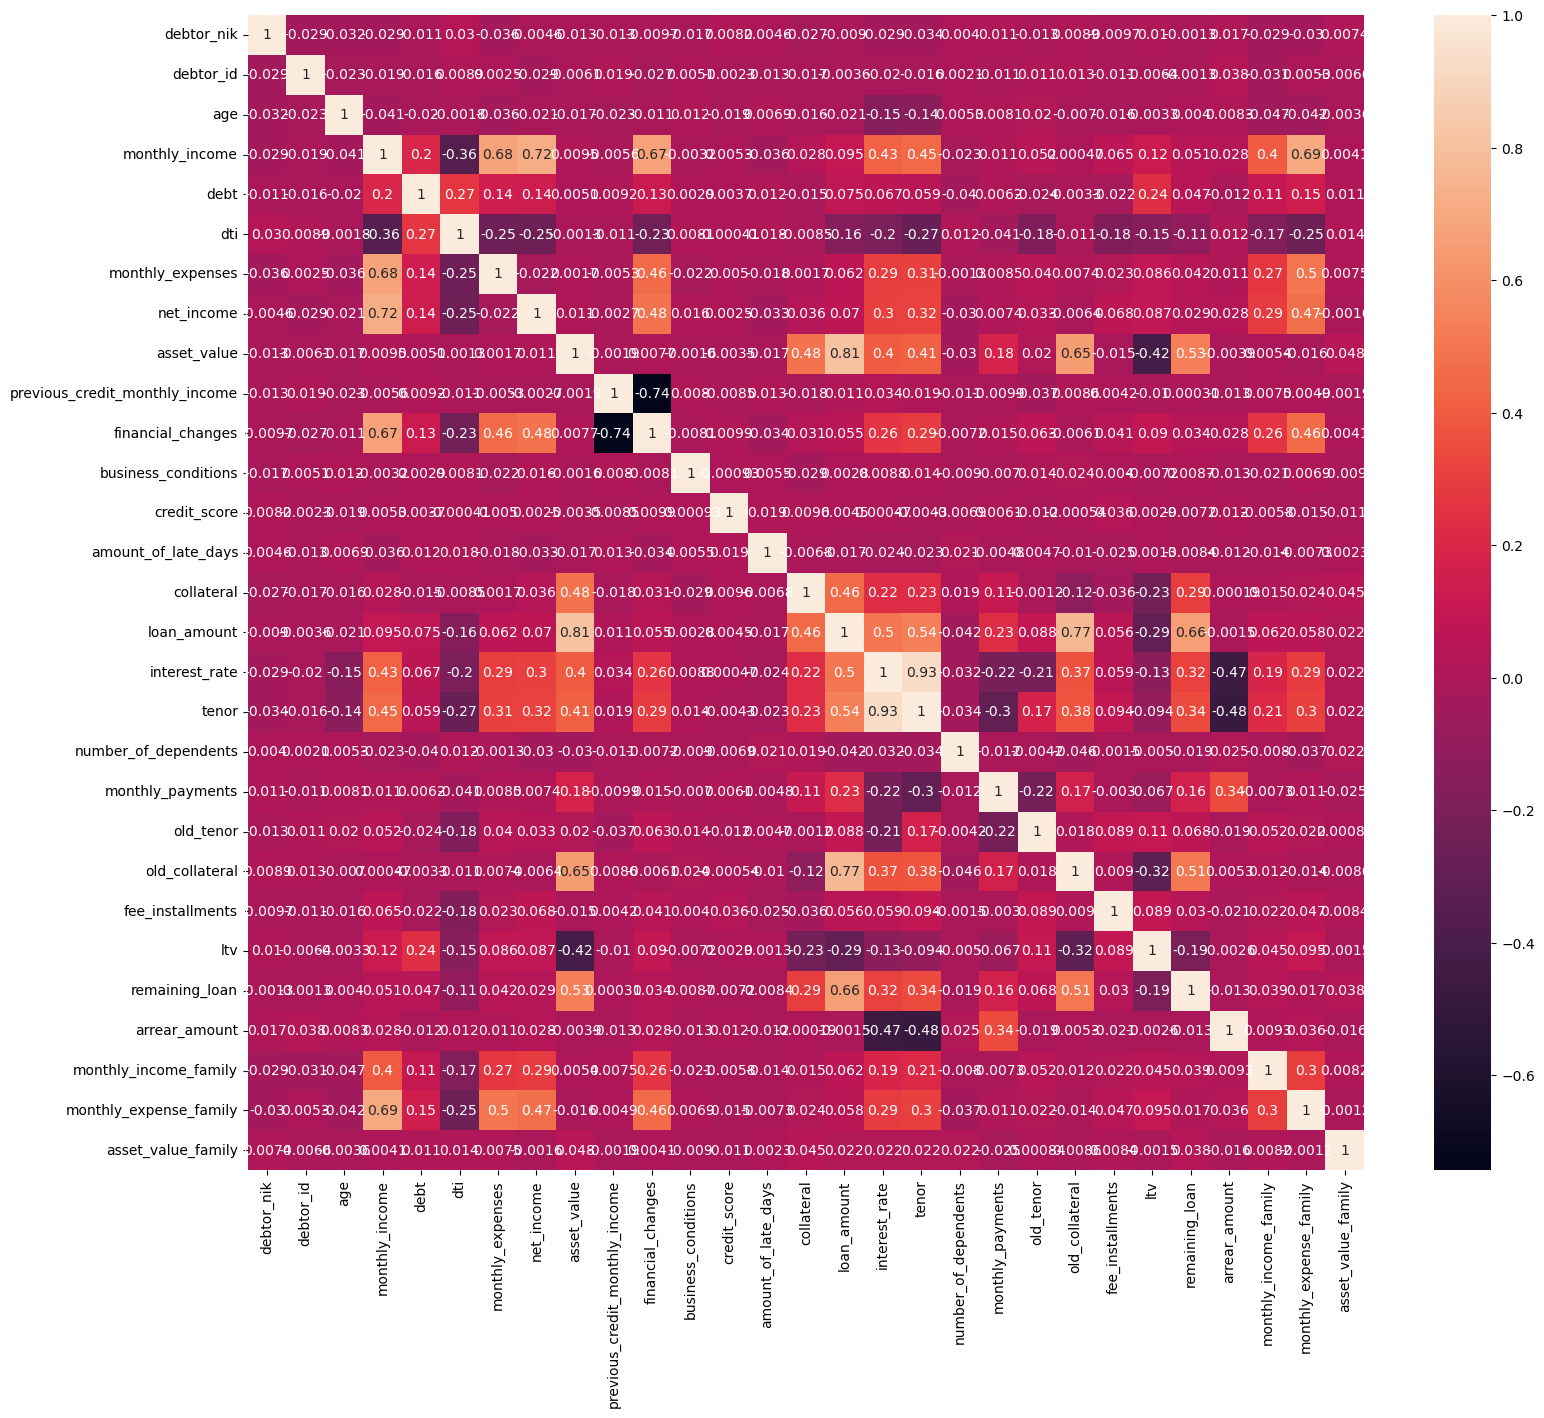

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(),annot=True)

### Boxplot tenor

<Axes: xlabel='tenor'>

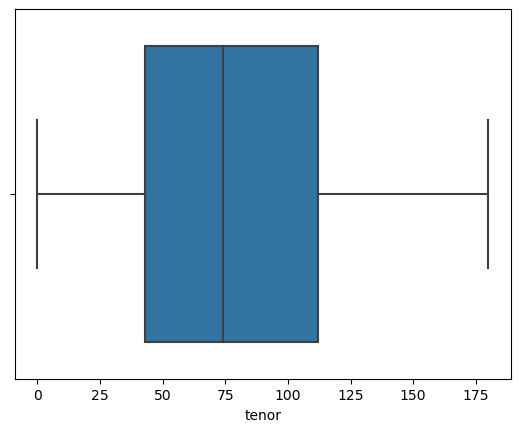

In [13]:
sns.boxplot(data=df, x='tenor')

### Scatter plot

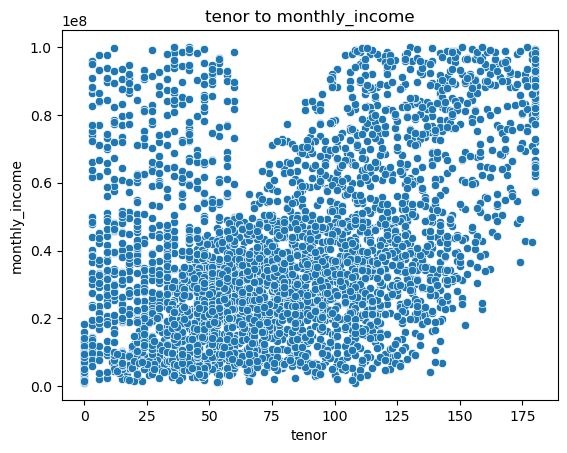

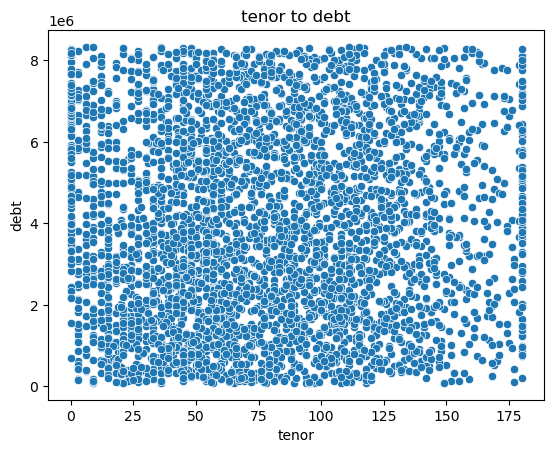

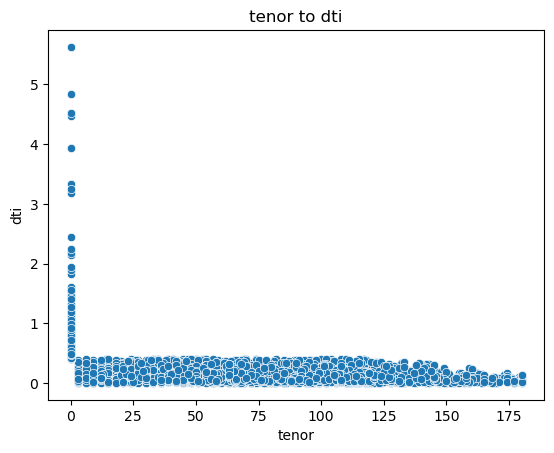

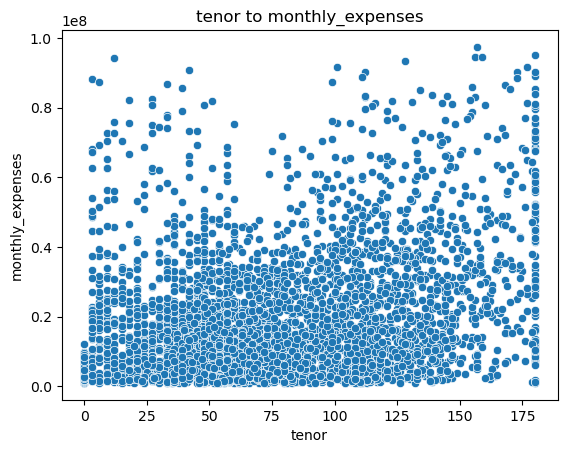

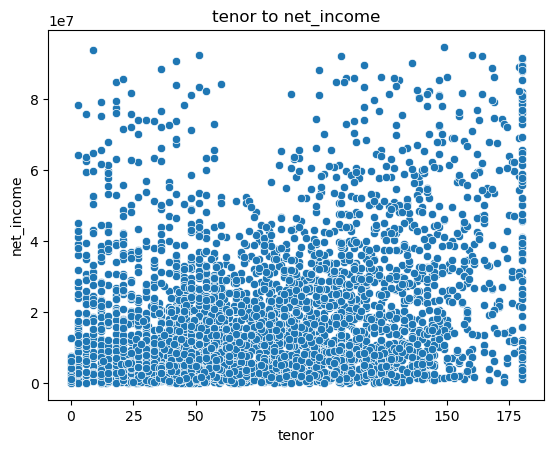

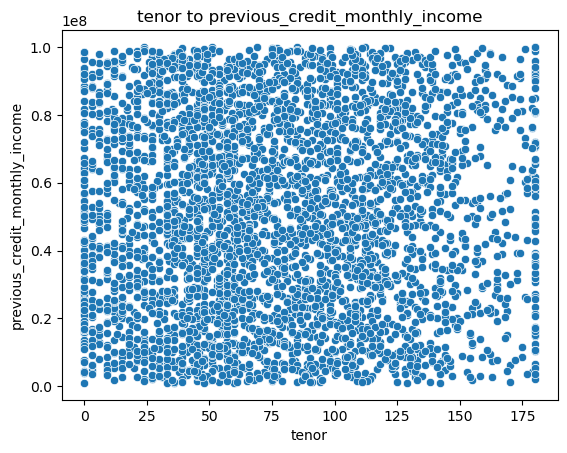

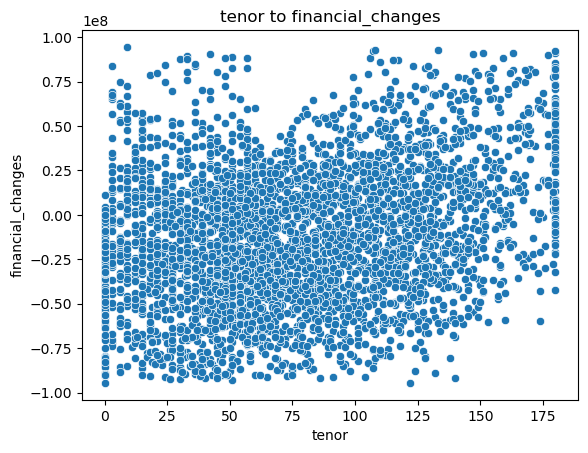

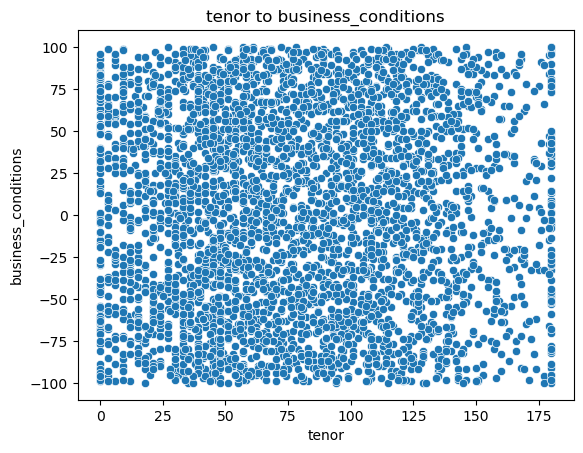

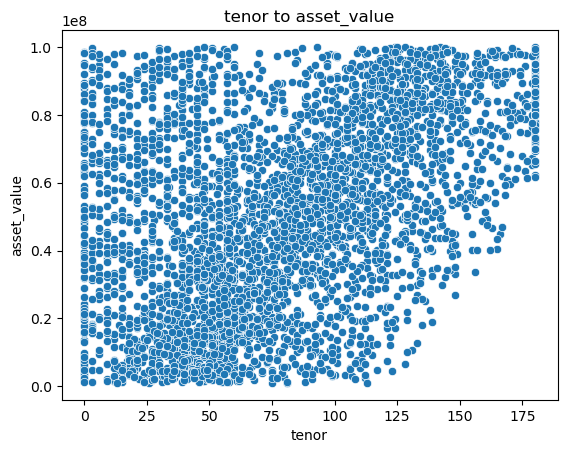

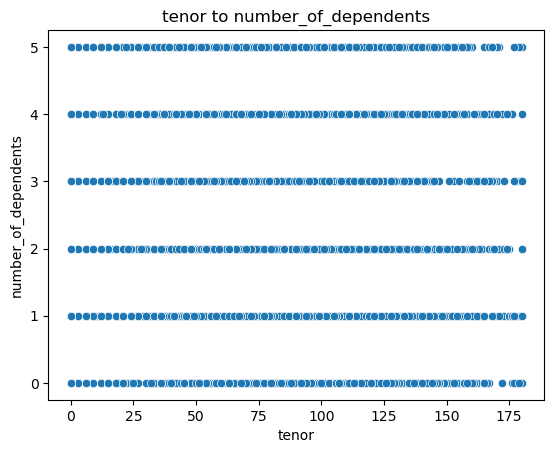

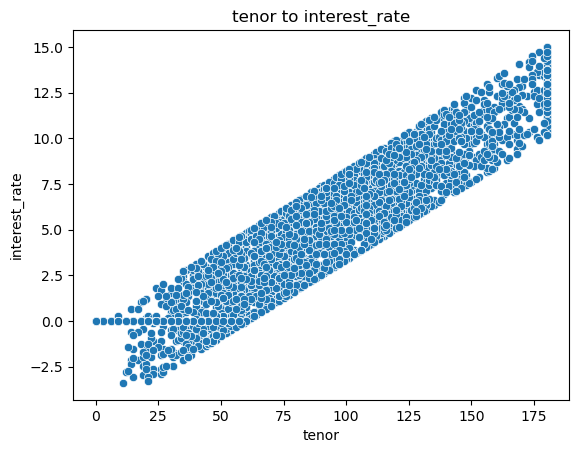

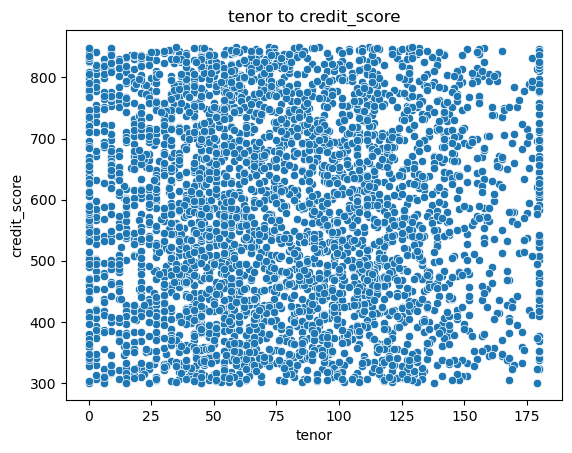

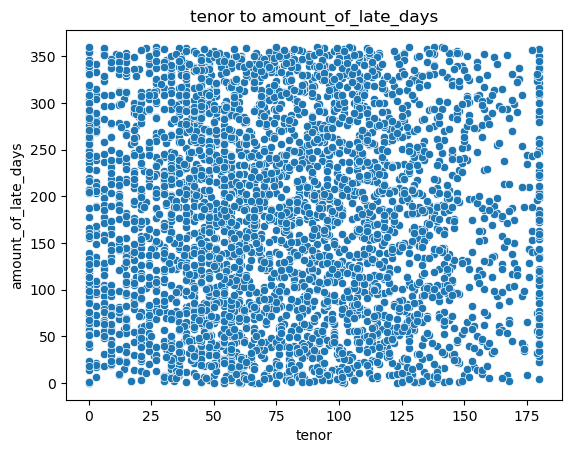

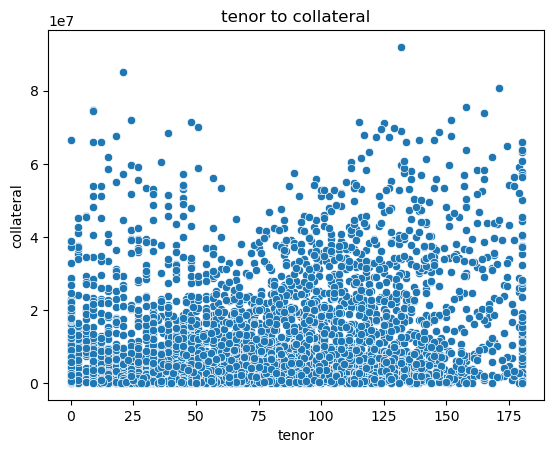

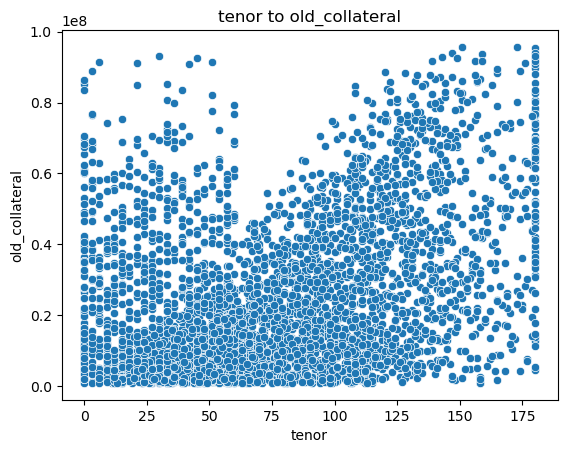

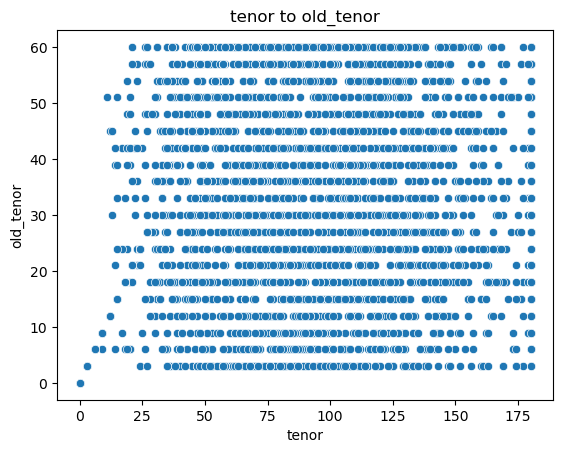

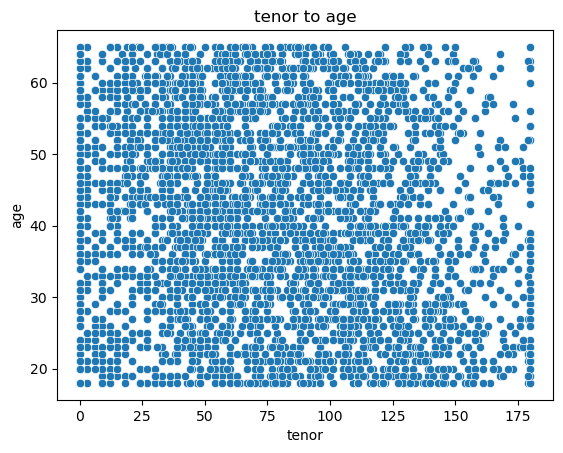

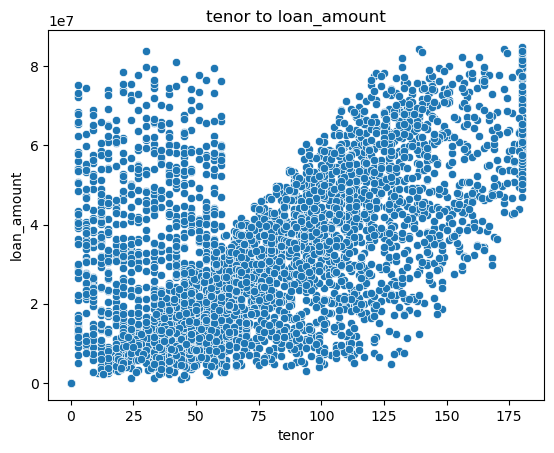

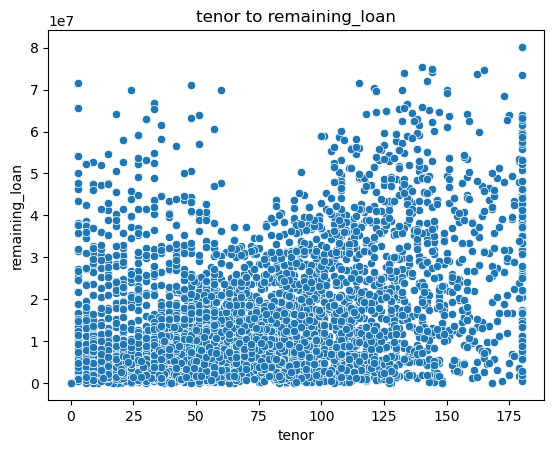

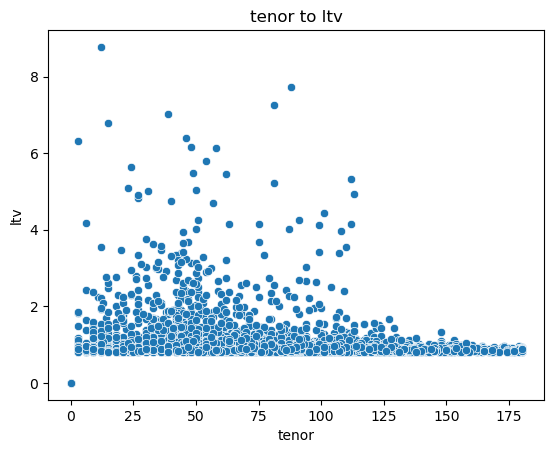

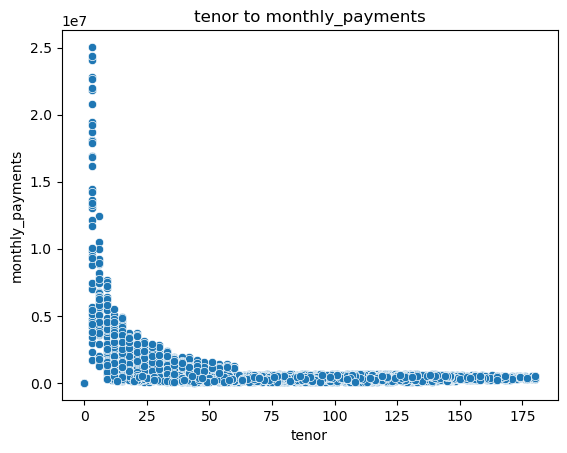

In [14]:
for column in ['monthly_income', 'debt', 'dti', 'monthly_expenses',
                   'net_income','previous_credit_monthly_income',
                   'financial_changes', 'business_conditions', 'asset_value',
                   'number_of_dependents', 'interest_rate', 'credit_score',
                   'amount_of_late_days', 'collateral', 'old_collateral', 'old_tenor', 'age',
                   'loan_amount', 'remaining_loan', 'ltv', 'monthly_payments']:
  sns.scatterplot(data=df, x="tenor", y=column)
  plt.title(f'tenor to {column}')
  plt.show()

berdasarkan grafik diatas semakin besar pendapatan, pengeluaran, kapasitas finansial dan total asset maka tenor juga semakin lama

In [15]:
tenor = ['monthly_income', 'debt', 'dti', 'monthly_expenses',
        'net_income','previous_credit_monthly_income',
        'financial_changes', 'business_conditions', 'asset_value',
        'number_of_dependents', 'interest_rate', 'credit_score',
        'amount_of_late_days', 'collateral', 'old_collateral', 'old_tenor', 'age',
        'loan_amount', 'remaining_loan', 'ltv', 'monthly_payments',
        'occupation', 'credit_goals',
        'arrear_amount',
        'monthly_income_family', 'monthly_expense_family',
        'family_health', 'asset_value_family',
        'tenor']
df[tenor].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   monthly_income                  3777 non-null   int64  
 1   debt                            3777 non-null   float64
 2   dti                             3777 non-null   float64
 3   monthly_expenses                3777 non-null   int64  
 4   net_income                      3777 non-null   int64  
 5   previous_credit_monthly_income  3777 non-null   int64  
 6   financial_changes               3777 non-null   int64  
 7   business_conditions             3777 non-null   int64  
 8   asset_value                     3777 non-null   int64  
 9   number_of_dependents            3777 non-null   int64  
 10  interest_rate                   3777 non-null   float64
 11  credit_score                    3777 non-null   int64  
 12  amount_of_late_days             37

C:\Users\User\AppData\Local\Temp\ipykernel_4156\2608306179.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[tenor].corr(),annot=True)


<Axes: >

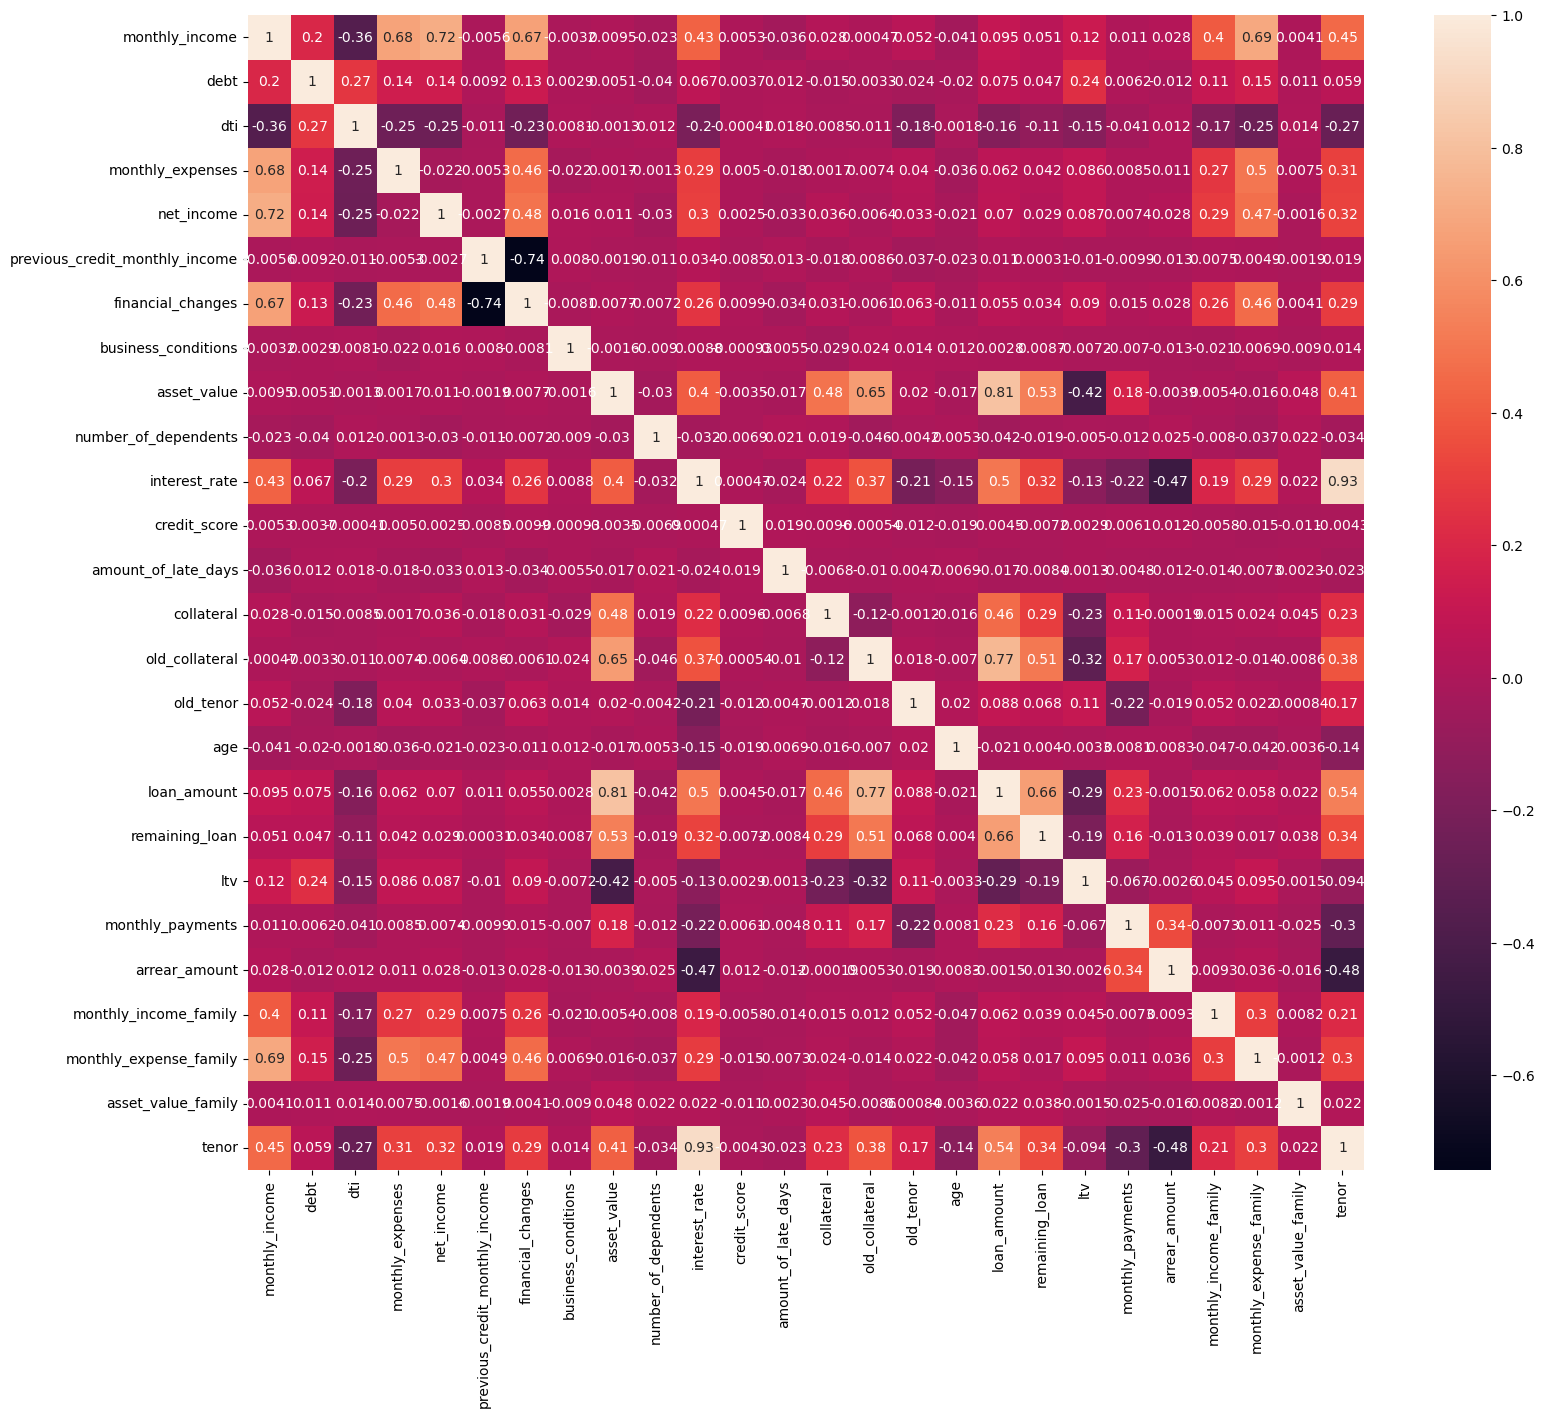

In [16]:
plt.figure(figsize=(18, 15))
sns.heatmap(df[tenor].corr(),annot=True)

In [17]:
loan = ['monthly_income', 'debt', 'dti', 'monthly_expenses',
        'net_income','previous_credit_monthly_income',
        'financial_changes', 'business_conditions', 'asset_value',
        'interest_rate', 'collateral','old_collateral', 'loan_amount', 'ltv',
        'occupation', 'tenor']
df[loan].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   monthly_income                  3777 non-null   int64  
 1   debt                            3777 non-null   float64
 2   dti                             3777 non-null   float64
 3   monthly_expenses                3777 non-null   int64  
 4   net_income                      3777 non-null   int64  
 5   previous_credit_monthly_income  3777 non-null   int64  
 6   financial_changes               3777 non-null   int64  
 7   business_conditions             3777 non-null   int64  
 8   asset_value                     3777 non-null   int64  
 9   interest_rate                   3777 non-null   float64
 10  collateral                      3777 non-null   int64  
 11  old_collateral                  3777 non-null   int64  
 12  loan_amount                     37

C:\Users\User\AppData\Local\Temp\ipykernel_4156\909924372.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[loan].corr(),annot=True)


<Axes: >

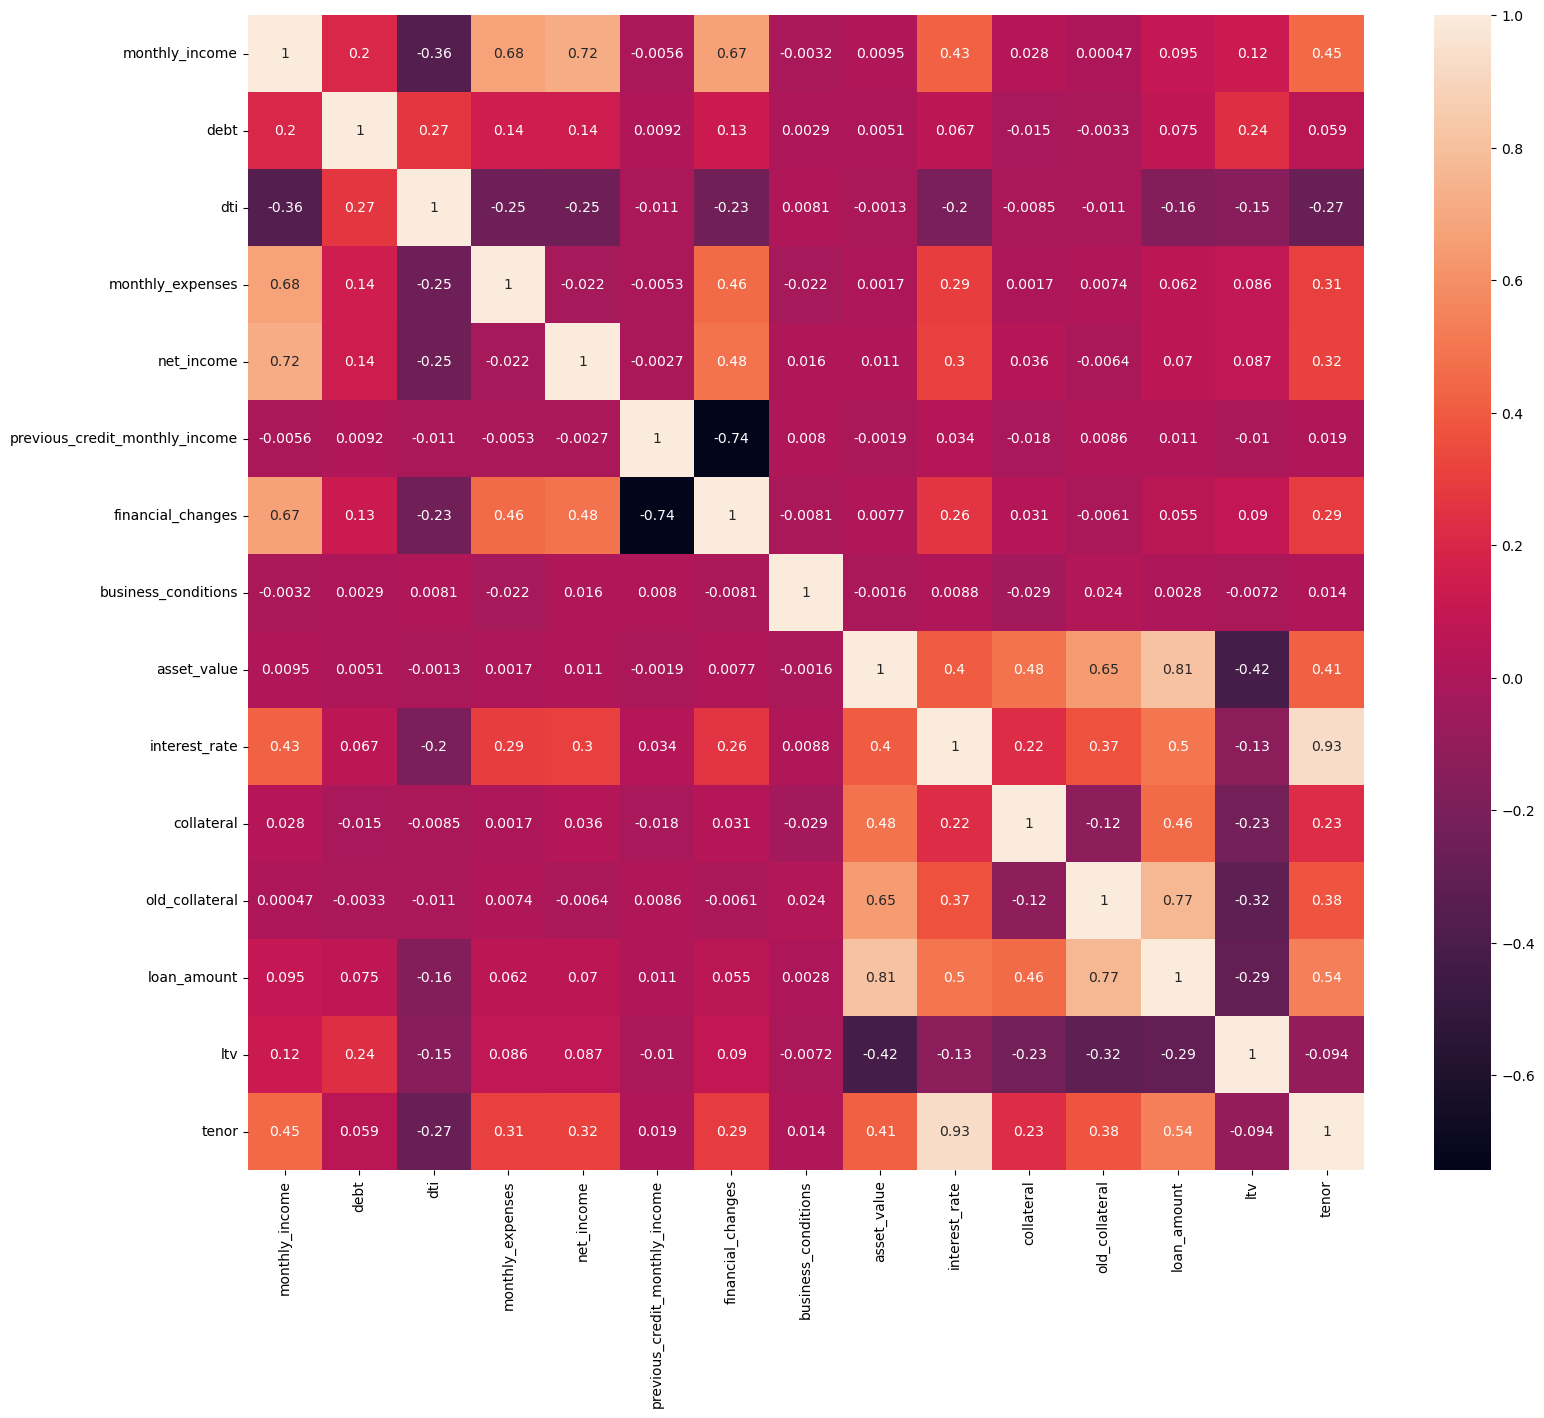

In [18]:
plt.figure(figsize=(18, 15))
sns.heatmap(df[loan].corr(),annot=True)

# AI Changes Tenor and Monthly Installment

## Preprocessing

1.   Normalisasi angka
2.   Encode kategori



In [19]:
df_tenor = df[tenor]
df_tenor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   monthly_income                  3777 non-null   int64  
 1   debt                            3777 non-null   float64
 2   dti                             3777 non-null   float64
 3   monthly_expenses                3777 non-null   int64  
 4   net_income                      3777 non-null   int64  
 5   previous_credit_monthly_income  3777 non-null   int64  
 6   financial_changes               3777 non-null   int64  
 7   business_conditions             3777 non-null   int64  
 8   asset_value                     3777 non-null   int64  
 9   number_of_dependents            3777 non-null   int64  
 10  interest_rate                   3777 non-null   float64
 11  credit_score                    3777 non-null   int64  
 12  amount_of_late_days             37

In [20]:
X = df_tenor.drop('tenor', axis=1)
y = df.tenor
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   monthly_income                  3777 non-null   int64  
 1   debt                            3777 non-null   float64
 2   dti                             3777 non-null   float64
 3   monthly_expenses                3777 non-null   int64  
 4   net_income                      3777 non-null   int64  
 5   previous_credit_monthly_income  3777 non-null   int64  
 6   financial_changes               3777 non-null   int64  
 7   business_conditions             3777 non-null   int64  
 8   asset_value                     3777 non-null   int64  
 9   number_of_dependents            3777 non-null   int64  
 10  interest_rate                   3777 non-null   float64
 11  credit_score                    3777 non-null   int64  
 12  amount_of_late_days             37

In [21]:
numerical_tenor = ['monthly_income', 'debt', 'dti', 'monthly_expenses',
                   'net_income','previous_credit_monthly_income',
                   'financial_changes', 'business_conditions', 'asset_value',
                   'number_of_dependents', 'interest_rate', 'credit_score',
                   'amount_of_late_days', 'collateral', 'old_collateral', 'old_tenor', 'age',
                   'loan_amount', 'remaining_loan', 'ltv', 'monthly_payments',
                   'arrear_amount',
                   'monthly_income_family', 'monthly_expense_family',
                   'asset_value_family']
categorical_tenor = ['occupation', 'credit_goals','family_health']

### Normalization

In [22]:

from sklearn.preprocessing import StandardScaler
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi pada dataset
X[numerical_tenor] = scaler.fit_transform(X[numerical_tenor])
X.head()

monthly_income      debt       dti  monthly_expenses  net_income  \
0        0.446198  1.721201 -0.014093         -0.912527    1.473588   
1       -0.025509  0.585701 -0.091530          0.237550   -0.260068   
2        0.395934  1.830860  0.023354          0.848703   -0.265337   
3       -0.327092 -0.857552 -0.395041          0.115320   -0.555158   
4       -1.185444 -0.479052  0.729761         -0.679178   -0.971447   

   previous_credit_monthly_income  financial_changes  business_conditions  \
0                       -0.822734           0.906928             0.575718   
1                        0.544736          -0.419919             1.459628   
2                        0.614684          -0.189725            -0.620160   
3                       -0.486987           0.141340            -1.521401   
4                        0.520255          -1.177748            -1.088112   

   asset_value  number_of_dependents  ...  remaining_loan       ltv  \
0     1.394109             -1.467975  ...        1.573807 -0.245161   
1    -1.298742              0.287553  ...       -1.069236  0.409736   
2     0.269738             -0.882799  ...       -0.139152 -0.105385   
3    -0.258963             -0.882799  ...       -0.025401 -0.328557   
4    -0.565610              0.287553  ...       -0.721291 -0.014060   

   monthly_payments      occupation      credit_goals  arrear_amount  \
0         -0.140110       Pengusaha         Investasi      -0.438144   
1         -0.317825       Pengusaha            Bisnis      -1.124242   
2         -0.208821  Pegawai Negeri            Bisnis       0.247955   
3         -0.041006       Pengusaha            Bisnis       2.992348   
4         -0.272236  Pegawai Swasta  Properti pribadi       0.934053   

   monthly_income_family  monthly_expense_family  family_health  \
0               0.325180                0.273195    Tidak sehat   
1               1.946510                0.908030          Sehat   
2              -0.589131               -0.223631          Sehat   
3              -0.344821                0.411203          Sehat   
4               2.361097               -0.830864    Tidak sehat   

   asset_value_family  
0           -0.420647  
1           -0.117635  
2            0.767018  
3           -1.047567  
4            0.958577  

[5 rows x 28 columns]

### Encoding

In [23]:
from sklearn.preprocessing import OrdinalEncoder


# Inisialisasi OrdinalEncoder
encoder = OrdinalEncoder()

# Melakukan encoding pada data kategori
X[categorical_tenor] = encoder.fit_transform(X[categorical_tenor])

X


monthly_income      debt       dti  monthly_expenses  net_income  \
0           0.446198  1.721201 -0.014093         -0.912527    1.473588   
1          -0.025509  0.585701 -0.091530          0.237550   -0.260068   
2           0.395934  1.830860  0.023354          0.848703   -0.265337   
3          -0.327092 -0.857552 -0.395041          0.115320   -0.555158   
4          -1.185444 -0.479052  0.729761         -0.679178   -0.971447   
...              ...       ...       ...               ...         ...   
3772       -1.328503  1.830860  7.036894         -0.945863   -0.913482   
3773       -1.212509  1.063248  2.850183         -0.918083   -0.781746   
3774       -1.154513  1.042023  2.226289         -0.940307   -0.681626   
3775       -1.293705  0.341621  2.973264         -0.829188   -0.976716   
3776       -1.123581  0.288560  1.249265         -0.618063   -0.945099   

      previous_credit_monthly_income  financial_changes  business_conditions  \
0                          -0.822734           0.906928             0.575718   
1                           0.544736          -0.419919             1.459628   
2                           0.614684          -0.189725            -0.620160   
3                          -0.486987           0.141340            -1.521401   
4                           0.520255          -1.177748            -1.088112   
...                              ...                ...                  ...   
3772                       -0.497479          -0.520791             1.632943   
3773                       -1.508218           0.304286             1.251649   
3774                       -0.924158          -0.088854             0.645044   
3775                       -0.976618          -0.143169            -1.122775   
3776                        1.457549          -1.829533            -0.204202   

      asset_value  number_of_dependents  ...  remaining_loan       ltv  \
0        1.394109             -1.467975  ...        1.573807 -0.245161   
1       -1.298742              0.287553  ...       -1.069236  0.409736   
2        0.269738             -0.882799  ...       -0.139152 -0.105385   
3       -0.258963             -0.882799  ...       -0.025401 -0.328557   
4       -0.565610              0.287553  ...       -0.721291 -0.014060   
...           ...                   ...  ...             ...       ...   
3772    -1.009719              0.872728  ...       -1.089309 -1.765917   
3773     1.055740             -0.882799  ...       -1.089309 -1.765917   
3774     0.223917              0.872728  ...       -1.089309 -1.765917   
3775     1.203777             -0.297623  ...       -1.089309 -1.765917   
3776     1.573868              1.457904  ...       -1.089309 -1.765917   

      monthly_payments  occupation  credit_goals  arrear_amount  \
0            -0.140110         3.0           1.0      -0.438144   
1            -0.317825         3.0           0.0      -1.124242   
2            -0.208821         1.0           0.0       0.247955   
3            -0.041006         3.0           0.0       2.992348   
4            -0.272236         2.0           3.0       0.934053   
...                ...         ...           ...            ...   
3772         -0.421812         1.0           1.0      -1.124242   
3773         -0.421812         1.0           0.0       0.247955   
3774         -0.421812         4.0           3.0       0.247955   
3775         -0.421812         4.0           0.0       1.620151   
3776         -0.421812         1.0           0.0      -0.438144   

      monthly_income_family  monthly_expense_family  family_health  \
0                  0.325180                0.273195            1.0   
1                  1.946510                0.908030            0.0   
2                 -0.589131               -0.223631            0.0   
3                 -0.344821                0.411203            0.0   
4                  2.361097               -0.830864            1.0   
...                     ...               

### Splitting Data change tenor and monthly installments

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)
X_train.shape

(3021, 28)

In [25]:
y_train.shape

(3021,)

In [26]:
df['loan_amount'].loc[df['loan_amount'] == 0].count()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777 entries, 0 to 3776
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   debtor_name                     3777 non-null   object 
 1   debtor_nik                      3777 non-null   float64
 2   debtor_address                  3777 non-null   object 
 3   debtor_number                   3777 non-null   object 
 4   debtor_company                  3777 non-null   object 
 5   debtor_id                       3777 non-null   int64  
 6   age                             3777 non-null   int64  
 7   occupation                      3777 non-null   object 
 8   monthly_income                  3777 non-null   int64  
 9   debt                            3777 non-null   float64
 10  dti                             3777 non-null   float64
 11  monthly_expenses                3777 non-null   int64  
 12  net_income                      37

## Modelling & Evaluation

### Machine Learning

In [27]:
#pip install lazypredict

In [28]:
from lazypredict.Supervised import LazyRegressor
reg= LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None, random_state=15)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [03:49<00:00,  5.45s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5323
[LightGBM] [Info] Number of data points in the train set: 3021, number of used features: 28
[LightGBM] [Info] Start training from score 77.762661


Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LassoLarsIC                                  1.00       1.00  0.00        0.03
RANSACRegressor                              1.00       1.00  0.00        0.02
LinearRegression                             1.00       1.00  0.00        0.02
LarsCV                                       1.00       1.00  0.00        0.03
Lars                                         1.00       1.00  0.00        0.02
OrthogonalMatchingPursuit                    1.00       1.00  0.00        0.03
LassoLarsCV                                  1.00       1.00  0.00        0.02
OrthogonalMatchingPursuitCV                  1.00       1.00  0.00        0.03
TransformedTargetRegressor                   1.00       1.00  0.00        0.02
BayesianRidge                                1.00       1.00  0.00        0.14
LinearSVR                                    1.00       1.00  0.00        0.02
RidgeCV                                      1.00       1.00  0.00        0.02
PassiveAggressiveRegressor                   1.00       1.00  0.04        0.02
Ridge                                        1.00       1.00  0.04        0.00
LassoCV                                      1.00       1.00  0.07        0.09
SGDRegressor                                 1.00       1.00  0.17        0.03
HuberRegressor                               1.00       1.00  0.96        0.23
HistGradientBoostingRegressor                1.00       1.00  1.22        1.72
LGBMRegressor                                1.00       1.00  1.28        0.30
ExtraTreesRegressor                          1.00       1.00  1.37        2.37
GradientBoostingRegressor                    1.00       1.00  1.49        3.74
RandomForestRegressor                        1.00       1.00  1.52        4.53
XGBRegressor                                 1.00       1.00  1.63        0.30
LassoLars                                    1.00       1.00  1.68        0.02
Lasso                                        1.00       1.00  1.69        0.02
BaggingRegressor                             1.00       1.00  1.83        0.77
DecisionTreeRegressor                        1.00       1.00  3.01        0.09
ElasticNetCV                                 0.99       0.99  3.88        0.12
MLPRegressor                                 0.99       0.99  3.94        2.78
ExtraTreeRegressor                           0.98       0.98  6.54        0.04
AdaBoostRegressor                            0.97       0.97  8.07        0.95
PoissonRegressor                             0.95       0.95 10.47        0.04
ElasticNet                                   0.90       0.90 14.99        0.02
TweedieRegressor                             0.84       0.84 18.95        0.02
SVR                                          0.78       0.79 22.05        0.63
NuSVR                                        0.76       0.77 22.71        0.76
DummyRegressor                              -0.04      -0.00 47.58        0.02
QuantileRegressor                           -0.06      -0.02 47.95      206.00
KernelRidge                                 -1.78      -1.67 77.77        0.44
GaussianProcessRegressor                    -2.81      -2.67 91.07        2.53

### Evluate Top 5 Model

In [29]:
def evaluate_performa(X_test, y_test, model1, model2, model3, model4, model5):
    rate = [0, 0, 0, 0, 0]
    #difference = [0, 0, 0, 0, 0]

    X_test = X_test.reset_index(drop=True)
    for i, _ in X_test.iterrows():
        X = np.array(X_test.iloc[[i]])
        y = np.array(y_test.iloc[[i]])
        difference = [0, 0, 0, 0, 0]
        difference[0] = abs(model1.predict(X) - y[0])
        difference[1] = abs(model2.predict(X) - y[0])
        difference[2] = abs(model3.predict(X) - y[0])
        difference[3] = abs(model4.predict(X) - y[0])
        difference[4] = abs(model5.predict(X) - y[0])
        print(difference)

        a = int(np.argmin(difference))
        print(a)
        for i in range(len(difference)):
            if difference[a] == difference[i]:
                rate[i] += 1

    return rate, np.argmax(rate)

In [30]:
from sklearn.linear_model import LassoLarsCV, RANSACRegressor, Lars, LassoLarsIC, LinearRegression

model_rt1 = LassoLarsCV()
model_rt2 = RANSACRegressor()
model_rt3 = Lars()
model_rt4 = LassoLarsIC()
model_rt5 = LinearRegression()

model_rt1.fit(X_train, y_train)
model_rt2.fit(X_train, y_train)
model_rt3.fit(X_train, y_train)
model_rt4.fit(X_train, y_train)
model_rt5.fit(X_train, y_train)

#joblib.dump(model_rt1, 'model/model_rt1.joblib')
list_evaluate, best_model = evaluate_performa(X_test, y_test, model_rt1, model_rt2, model_rt3, model_rt4, model_rt5)
print('List Evaluate =', list_evaluate)
print('best model :', best_model)

[array([1.98951966e-13]), array([7.10542736e-14]), array([1.98951966e-13]), array([1.98951966e-13]), array([0.])]
4
[array([5.68434189e-14]), array([8.52651283e-14]), array([5.68434189e-14]), array([5.68434189e-14]), array([8.52651283e-14])]
0
[array([2.77111667e-13]), array([6.39488462e-14]), array([2.77111667e-13]), array([2.77111667e-13]), array([4.97379915e-14])]
4
[array([4.76063633e-13]), array([1.42108547e-14]), array([4.76063633e-13]), array([4.76063633e-13]), array([2.13162821e-14])]
1
[array([4.68958206e-13]), array([8.52651283e-14]), array([4.68958206e-13]), array([4.68958206e-13]), array([4.26325641e-14])]
4
[array([5.68434189e-13]), array([2.84217094e-14]), array([5.68434189e-13]), array([5.68434189e-13]), array([1.13686838e-13])]
1
[array([7.38964445e-13]), array([1.13686838e-13]), array([7.38964445e-13]), array([7.38964445e-13]), array([1.70530257e-13])]
1
[array([4.97379915e-14]), array([3.55271368e-14]), array([4.97379915e-14]), array([4.97379915e-14]), array([2.131628

Model terbaik adalah RANSACRegressor()

In [31]:

from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor()
model.fit(X_train, y_train)


RANSACRegressor()

In [32]:
X_test.iloc[[0]]

monthly_income  debt  dti  monthly_expenses  net_income  \
3583           -0.39  1.87 0.51              0.32       -0.83   

      previous_credit_monthly_income  financial_changes  business_conditions  \
3583                            0.79              -0.84                -0.27   

      asset_value  number_of_dependents  ...  remaining_loan  ltv  \
3583        -0.14                 -1.47  ...           -0.86 0.21   

      monthly_payments  occupation  credit_goals  arrear_amount  \
3583             -0.20        3.00          3.00           0.25   

      monthly_income_family  monthly_expense_family  family_health  \
3583                   2.38                   -0.99           0.00   

      asset_value_family  
3583               -0.44  

[1 rows x 28 columns]

In [33]:
X = np.array(X_test.iloc[[0]])
#X.reshape((-1, 1))
model.predict(X)[0]

69.99999999999993

In [34]:
y_pred = model.predict(X_test)
y_pred

array([7.00000000e+01, 9.70000000e+01, 3.00000000e+01, 3.90000000e+01,
       1.28000000e+02, 1.80000000e+02, 1.59000000e+02, 5.40000000e+01,
       1.80000000e+01, 1.07000000e+02, 7.70000000e+01, 6.40000000e+01,
       4.20000000e+01, 9.80000000e+01, 1.01000000e+02, 1.26000000e+02,
       6.00000000e+01, 6.00000000e+01, 1.57000000e+02, 5.30000000e+01,
       1.08000000e+02, 1.44000000e+02, 3.90000000e+01, 3.50000000e+01,
       4.70000000e+01, 1.22000000e+02, 1.29000000e+02, 1.16000000e+02,
       8.20000000e+01, 4.80000000e+01, 0.00000000e+00, 1.19000000e+02,
       7.70000000e+01, 2.84217094e-14, 9.94759830e-14, 6.30000000e+01,
       1.04000000e+02, 1.32000000e+02, 3.20000000e+01, 4.30000000e+01,
       6.60000000e+01, 9.00000000e+01, 8.50000000e+01, 4.70000000e+01,
       1.80000000e+02, 1.21000000e+02, 1.31000000e+02, 3.30000000e+01,
       4.50000000e+01, 1.01000000e+02, 5.10000000e+01, 6.60000000e+01,
       6.90000000e+01, 1.53000000e+02, 8.70000000e+01, 2.40000000e+01,
      

In [35]:
y_test

3583     70
570      97
2691     30
992      39
735     128
       ... 
3304    120
975      94
1171    142
3158    111
426      44
Name: tenor, Length: 756, dtype: int64

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"R - Mean Squared Error (RMSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

R - Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R2): 1.00


### Save model

In [38]:
# Mengubah Angsuran
def calculate_monthly_installments(loan_amount, interest_rate, tenor):
  return ((loan_amount+(loan_amount*interest_rate/100))/tenor)

### Deep Learning

In [39]:
'''model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(28,)),
    keras.layers.Dense(1)  # Layer output tanpa aktivasi (regresi)
])
# Kompilasi model
model.compile(optimizer=SGD(learning_rate=0.001),
              loss=MeanSquaredError(),
              metrics=[RootMeanSquaredError(name='rmse')])

model.fit(X_train, y_train,
          epochs=50,
          batch_size=12,
          validation_data=(X_test, y_test))'''

"model = keras.Sequential([\n    keras.layers.Dense(10, activation='relu', input_shape=(28,)),\n    keras.layers.Dense(1)  # Layer output tanpa aktivasi (regresi)\n])\n# Kompilasi model\nmodel.compile(optimizer=SGD(learning_rate=0.001),\n              loss=MeanSquaredError(),\n              metrics=[RootMeanSquaredError(name='rmse')])\n\nmodel.fit(X_train, y_train,\n          epochs=50,\n          batch_size=12,\n          validation_data=(X_test, y_test))"

### Save Model Tenor and Evaluation Selisih

In [40]:
def evaluate_performa(X_test, y_test, model1, model2, model3, model4, model5):
    rate = [0, 0, 0, 0, 0]
    #difference = [0, 0, 0, 0, 0]

    X_test = X_test.reset_index(drop=True)
    for i, _ in X_test.iterrows():
        X = np.array(X_test.iloc[[i]])
        y = np.array(y_test.iloc[[i]])
        difference = [0, 0, 0, 0, 0]
        difference[0] = abs(model1.predict(X) - y[0])
        difference[1] = abs(model2.predict(X) - y[0])
        difference[2] = abs(model3.predict(X) - y[0])
        difference[3] = abs(model4.predict(X) - y[0])
        difference[4] = abs(model5.predict(X) - y[0])
        print(difference)

        a = int(np.argmin(difference))
        print(a)
        for i in range(len(difference)):
            if difference[a] == difference[i]:
                rate[i] += 1

    return rate, np.argmax(rate)

In [41]:
from sklearn.linear_model import LassoLarsCV, RANSACRegressor, LarsCV, Lars, LinearRegression

model_rt1 = LassoLarsCV()
model_rt2 = RANSACRegressor()
model_rt3 = LarsCV()
model_rt4 = Lars()
model_rt5 = LinearRegression()

model_rt1.fit(X_train, y_train)
model_rt2.fit(X_train, y_train)
model_rt3.fit(X_train, y_train)
model_rt4.fit(X_train, y_train)
model_rt5.fit(X_train, y_train)

#joblib.dump(model_rt1, 'model/model_rt1.joblib')
list_evaluate, best_model = evaluate_performa(X_test, y_test, model_rt1, model_rt2, model_rt3, model_rt4, model_rt5)
print('List Evaluate =', list_evaluate)
print('best model :', best_model)

[array([1.98951966e-13]), array([7.10542736e-14]), array([1.98951966e-13]), array([1.98951966e-13]), array([0.])]
4
[array([5.68434189e-14]), array([8.52651283e-14]), array([5.68434189e-14]), array([5.68434189e-14]), array([8.52651283e-14])]
0
[array([2.77111667e-13]), array([6.39488462e-14]), array([2.77111667e-13]), array([2.77111667e-13]), array([4.97379915e-14])]
4
[array([4.76063633e-13]), array([1.42108547e-14]), array([4.76063633e-13]), array([4.76063633e-13]), array([2.13162821e-14])]
1
[array([4.68958206e-13]), array([8.52651283e-14]), array([4.68958206e-13]), array([4.68958206e-13]), array([4.26325641e-14])]
4
[array([5.68434189e-13]), array([2.84217094e-14]), array([5.68434189e-13]), array([5.68434189e-13]), array([1.13686838e-13])]
1
[array([7.38964445e-13]), array([1.13686838e-13]), array([7.38964445e-13]), array([7.38964445e-13]), array([1.70530257e-13])]
1
[array([4.97379915e-14]), array([3.55271368e-14]), array([4.97379915e-14]), array([4.97379915e-14]), array([2.131628

[array([8.38440428e-13]), array([2.84217094e-14]), array([8.38440428e-13]), array([8.38440428e-13]), array([9.9475983e-14])]
1
[array([2.4158453e-13]), array([1.20792265e-13]), array([2.4158453e-13]), array([2.4158453e-13]), array([7.10542736e-15])]
4
[array([3.62376795e-13]), array([3.55271368e-14]), array([3.62376795e-13]), array([3.62376795e-13]), array([1.20792265e-13])]
1
[array([1.42108547e-14]), array([8.52651283e-14]), array([1.42108547e-14]), array([1.42108547e-14]), array([5.68434189e-14])]
0
[array([5.96855898e-13]), array([5.68434189e-14]), array([5.96855898e-13]), array([5.96855898e-13]), array([5.68434189e-14])]
1
[array([3.19744231e-13]), array([7.10542736e-15]), array([3.19744231e-13]), array([3.19744231e-13]), array([4.26325641e-14])]
1
[array([7.10542736e-13]), array([8.52651283e-14]), array([7.10542736e-13]), array([7.10542736e-13]), array([0.])]
4
[array([4.90274488e-13]), array([1.13686838e-13]), array([4.90274488e-13]), array([4.90274488e-13]), array([2.84217094e-

### Pipeline Model Changes Tenor

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('standar_scaler', StandardScaler())
])
numerical_transformer

Pipeline(steps=[('standar_scaler', StandardScaler())])

In [43]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('Ordinal', OrdinalEncoder())
])
categorical_transformer

Pipeline(steps=[('Ordinal', OrdinalEncoder())])

In [44]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_tenor),
        ('categorical', categorical_transformer, categorical_tenor)
    ])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('standar_scaler',
                                                  StandardScaler())]),
                                 ['monthly_income', 'debt', 'dti',
                                  'monthly_expenses', 'net_income',
                                  'previous_credit_monthly_income',
                                  'financial_changes', 'business_conditions',
                                  'asset_value', 'number_of_dependents',
                                  'interest_rate', 'credit_score',
                                  'amount_of_late_days', 'collateral',
                                  'old_collateral', 'old_tenor', 'age',
                                  'loan_amount', 'remaining_loan', 'ltv',
                                  'monthly_payments', 'arrear_amount',
                                  'monthly_income_family',
                                  'monthly_expense_family',
                                  'asset_value_family']),
                                ('categorical',
                                 Pipeline(steps=[('Ordinal',
                                                  OrdinalEncoder())]),
                                 ['occupation', 'credit_goals',
                                  'family_health'])])

In [45]:
from sklearn import linear_model
model = linear_model.Lars()

# Bundle preprocessing and modeling code in a pipeline
pipeline1 = Pipeline(steps=[('preprocessing', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standar_scaler',
                                                                   StandardScaler())]),
                                                  ['monthly_income', 'debt',
                                                   'dti', 'monthly_expenses',
                                                   'net_income',
                                                   'previous_credit_monthly_income',
                                                   'financial_changes',
                                                   'business_conditions',
                                                   'asset_value',
                                                   'number_of_dependents',
                                                   'interest_rate',
                                                   'credit_score',
                                                   'amount_of_late_days',
                                                   'collateral',
                                                   'old_collateral',
                                                   'old_tenor', 'age',
                                                   'loan_amount',
                                                   'remaining_loan', 'ltv',
                                                   'monthly_payments',
                                                   'arrear_amount',
                                                   'monthly_income_family',
                                                   'monthly_expense_family',
                                                   'asset_value_family']),
                                                 ('categorical',
                                                  Pipeline(steps=[('Ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['occupation', 'credit_goals',
                                                   'family_health'])])),
                ('model', Lars())])

In [46]:
y_pred_p = pipeline1.predict(X_test)
y_pred_p

array([7.00000000e+01, 9.70000000e+01, 3.00000000e+01, 3.90000000e+01,
       1.28000000e+02, 1.80000000e+02, 1.59000000e+02, 5.40000000e+01,
       1.80000000e+01, 1.07000000e+02, 7.70000000e+01, 6.40000000e+01,
       4.20000000e+01, 9.80000000e+01, 1.01000000e+02, 1.26000000e+02,
       6.00000000e+01, 6.00000000e+01, 1.57000000e+02, 5.30000000e+01,
       1.08000000e+02, 1.44000000e+02, 3.90000000e+01, 3.50000000e+01,
       4.70000000e+01, 1.22000000e+02, 1.29000000e+02, 1.16000000e+02,
       8.20000000e+01, 4.80000000e+01, 6.11066753e-13, 1.19000000e+02,
       7.70000000e+01, 6.11066753e-13, 6.11066753e-13, 6.30000000e+01,
       1.04000000e+02, 1.32000000e+02, 3.20000000e+01, 4.30000000e+01,
       6.60000000e+01, 9.00000000e+01, 8.50000000e+01, 4.70000000e+01,
       1.80000000e+02, 1.21000000e+02, 1.31000000e+02, 3.30000000e+01,
       4.50000000e+01, 1.01000000e+02, 5.10000000e+01, 6.60000000e+01,
       6.90000000e+01, 1.53000000e+02, 8.70000000e+01, 2.40000000e+01,
      

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = np.sqrt(mean_squared_error(y_test, y_pred_p))
mae = mean_absolute_error(y_test, y_pred_p)
r2 = r2_score(y_test, y_pred_p)

# Menampilkan hasil evaluasi
print(f"R - Mean Squared Error (RMSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

R - Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R2): 1.00


# AI Request Loan with new Collateral

## Preprocessing

### Balancing loan _amount for Request Loan with new Collateral

In [48]:
df['loan_amount'].loc[df['loan_amount'] == 0].count()
# Find the indices (row labels) where 'loan_amount' is equal to 0
indices_to_drop = df[df['loan_amount'] == 0].index

#sel_100 = df.loc[indices_to_drop[:100]]

# Drop the rows with those indices
df = df.drop(indices_to_drop, axis=0)
#sel_100


In [49]:
# Menggabungkan data berdasarkan kolom 'ID'
#df = pd.concat([df, sel_100], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   debtor_name                     3677 non-null   object 
 1   debtor_nik                      3677 non-null   float64
 2   debtor_address                  3677 non-null   object 
 3   debtor_number                   3677 non-null   object 
 4   debtor_company                  3677 non-null   object 
 5   debtor_id                       3677 non-null   int64  
 6   age                             3677 non-null   int64  
 7   occupation                      3677 non-null   object 
 8   monthly_income                  3677 non-null   int64  
 9   debt                            3677 non-null   float64
 10  dti                             3677 non-null   float64
 11  monthly_expenses                3677 non-null   int64  
 12  net_income                      36

In [50]:
df_loan = df[loan]
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   monthly_income                  3677 non-null   int64  
 1   debt                            3677 non-null   float64
 2   dti                             3677 non-null   float64
 3   monthly_expenses                3677 non-null   int64  
 4   net_income                      3677 non-null   int64  
 5   previous_credit_monthly_income  3677 non-null   int64  
 6   financial_changes               3677 non-null   int64  
 7   business_conditions             3677 non-null   int64  
 8   asset_value                     3677 non-null   int64  
 9   interest_rate                   3677 non-null   float64
 10  collateral                      3677 non-null   int64  
 11  old_collateral                  3677 non-null   int64  
 12  loan_amount                     36

In [51]:
X2 = df_loan.drop('loan_amount', axis=1)
y2 = df.loan_amount
y2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3677 entries, 0 to 3676
Series name: loan_amount
Non-Null Count  Dtype  
--------------  -----  
3677 non-null   float64
dtypes: float64(1)
memory usage: 28.9 KB


### Normalization

In [52]:
numerical_loan = ['monthly_income', 'debt', 'dti', 'monthly_expenses',
                  'net_income','previous_credit_monthly_income',
                  'financial_changes', 'business_conditions', 'asset_value',
                  'interest_rate', 'collateral', 'old_collateral', 'ltv', 'tenor']
categorical_loan = ['occupation']

In [53]:
from sklearn.preprocessing import StandardScaler
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi pada dataset
X2[numerical_loan] = scaler.fit_transform(X2[numerical_loan])
X2.head()

monthly_income  debt   dti  monthly_expenses  net_income  \
0            0.42  1.74  0.24             -0.93        1.45   
1           -0.06  0.60  0.04              0.21       -0.28   
2            0.37  1.85  0.33              0.82       -0.29   
3           -0.36 -0.84 -0.73              0.09       -0.58   
4           -1.23 -0.46  2.14             -0.70       -0.99   

   previous_credit_monthly_income  financial_changes  business_conditions  \
0                           -0.83               0.89                 0.58   
1                            0.54              -0.44                 1.46   
2                            0.61              -0.21                -0.62   
3                           -0.49               0.12                -1.52   
4                            0.52              -1.20                -1.09   

   asset_value  interest_rate  collateral  old_collateral   ltv  \
0         1.39           1.78        2.77            0.35 -0.30   
1        -1.30          -0.60       -0.66           -0.79  0.37   
2         0.27           1.61       -0.76            0.93 -0.16   
3        -0.26          -1.05       -0.83            0.76 -0.39   
4        -0.57          -1.05       -0.37           -0.94 -0.06   

       occupation  tenor  
0       Pengusaha   1.88  
1       Pengusaha  -0.12  
2  Pegawai Negeri   1.09  
3       Pengusaha  -0.65  
4  Pegawai Swasta  -0.79

### Encoding

In [54]:
from sklearn.preprocessing import OrdinalEncoder

# Inisialisasi OrdinalEncoder
encoder = OrdinalEncoder()
# Melakukan encoding pada data kategori
X2[categorical_loan] = encoder.fit_transform(X2[categorical_loan])
X2.head(10)

monthly_income  debt   dti  monthly_expenses  net_income  \
0            0.42  1.74  0.24             -0.93        1.45   
1           -0.06  0.60  0.04              0.21       -0.28   
2            0.37  1.85  0.33              0.82       -0.29   
3           -0.36 -0.84 -0.73              0.09       -0.58   
4           -1.23 -0.46  2.14             -0.70       -0.99   
5           -1.17 -0.16  2.33             -1.03       -0.60   
6           -0.22 -0.40 -0.49             -0.16       -0.15   
7            0.48 -0.62 -0.89              0.69       -0.00   
8            0.44  0.86 -0.19              0.66       -0.04   
9           -1.29 -0.56  2.64             -0.96       -0.83   

   previous_credit_monthly_income  financial_changes  business_conditions  \
0                           -0.83               0.89                 0.58   
1                            0.54              -0.44                 1.46   
2                            0.61              -0.21                -0.62   
3                           -0.49               0.12                -1.52   
4                            0.52              -1.20                -1.09   
5                            0.85              -1.41                -1.69   
6                            0.22              -0.31                -1.04   
7                           -1.01               1.07                -0.88   
8                            0.03               0.27                -0.10   
9                           -1.14              -0.01                 0.49   

   asset_value  interest_rate  collateral  old_collateral   ltv  occupation  \
0         1.39           1.78        2.77            0.35 -0.30        3.00   
1        -1.30          -0.60       -0.66           -0.79  0.37        3.00   
2         0.27           1.61       -0.76            0.93 -0.16        1.00   
3        -0.26          -1.05       -0.83            0.76 -0.39        3.00   
4        -0.57          -1.05       -0.37           -0.94 -0.06        2.00   
5         1.28          -0.17       -0.85            0.72 -0.32        3.00   
6         1.46           1.15        1.92            1.16 -0.41        0.00   
7         0.77           1.07       -0.44            1.77 -0.41        2.00   
8        -1.41           0.01       -0.64           -0.90  0.67        2.00   
9        -1.12          -1.60       -0.81           -1.07  1.10        4.00   

   tenor  
0   1.88  
1  -0.12  
2   1.09  
3  -0.65  
4  -0.79  
5  -0.34  
6   1.43  
7   1.74  
8   0.11  
9  -1.48

### Splitting Data

In [55]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle = True)
X2_train.shape

(2941, 15)

## Model & Evaluation

### Machine Learning

In [56]:
from lazypredict.Supervised import LazyRegressor
reg= LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None, random_state=15)
models,predictions = reg.fit(X2_train, X2_test, y2_train, y2_test)
models

100%|██████████| 42/42 [05:58<00:00,  8.53s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 2941, number of used features: 15
[LightGBM] [Info] Start training from score 34007979.154582


Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
LassoLarsCV                                  1.00       1.00        0.00   
Lars                                         1.00       1.00        0.00   
TransformedTargetRegressor                   1.00       1.00        0.00   
RANSACRegressor                              1.00       1.00        0.00   
OrthogonalMatchingPursuitCV                  1.00       1.00        0.00   
LinearRegression                             1.00       1.00        0.00   
LassoLarsIC                                  1.00       1.00        0.00   
LarsCV                                       1.00       1.00        0.00   
LassoLars                                    1.00       1.00        1.93   
RidgeCV                                      1.00       1.00     1718.66   
Lasso                                        1.00       1.00     4046.99   
SGDRegressor                                 1.00       1.00     5064.60   
Ridge                                        1.00       1.00    17144.90   
LassoCV                                      1.00       1.00    31771.06   
HistGradientBoostingRegressor                1.00       1.00  1190413.37   
LGBMRegressor                                1.00       1.00  1201270.40   
ExtraTreesRegressor                          1.00       1.00  1286581.88   
XGBRegressor                                 0.99       0.99  1565745.38   
RandomForestRegressor                        0.99       0.99  1646167.57   
GradientBoostingRegressor                    0.99       0.99  1675251.37   
BaggingRegressor                             0.99       0.99  1858024.95   
DecisionTreeRegressor                        0.98       0.98  2897948.62   
HuberRegressor                               0.98       0.98  3004190.82   
ExtraTreeRegressor                           0.96       0.97  3675716.39   
AdaBoostRegressor                            0.95       0.95  4564406.77   
PoissonRegressor                             0.94       0.94  4725983.29   
KNeighborsRegressor                          0.91       0.92  5699438.18   
ElasticNet                                   0.90       0.90  6233406.98   
GammaRegressor                               0.84       0.84  7860086.70   
TweedieRegressor                             0.82       0.83  8209412.81   
OrthogonalMatchingPursuit                    0.69       0.70 10904204.39   
GaussianProcessRegressor                     0.30       0.31 16385115.91   
ElasticNetCV                                -0.02       0.00 19745896.40   
BayesianRidge                               -0.02      -0.00 19748536.87   
DummyRegressor                              -0.02      -0.00 19748536.87   
NuSVR                                       -0.02      -0.00 19788188.73   
SVR                                         -0.03      -0.01 19854441.09   
QuantileRegressor                           -0.03      -0.01 19854564.01   
KernelRidge                                 -2.03      -1.97 34006578.00   
PassiveAggressiveRegressor                  -2.56      -2.48 36856927.87   
MLPRegressor                                -3.06      -2.98 39377203.72   
LinearSVR                                   -3.06      -2.98 39380179.53   

                               Time Taken  
Model                                      
LassoLarsCV                          0.02  
Lars                                 0.01  
TransformedTargetRegressor           0.02  
RANSACRegressor                      0.01  
OrthogonalMatchingPursuitCV          0.02  
LinearRegression                     0.01  
LassoLarsIC                          0.01  
LarsCV                               0.02  
LassoLars                            0.01  
RidgeCV                              0.01  
Lasso                                0.01  
SGDRegressor                         0.03  
Ridge                                0.01  
LassoCV                   

In [57]:
from sklearn import linear_model
model2 = linear_model.Lars()
model2.fit(X2_train, y2_train)



Lars()

In [58]:
#joblib.dump(model2, 'model/model2.joblib')

In [59]:
#load_model2 = joblib.load('model/model2.joblib')

In [60]:

X = np.array(X2_test.iloc[[-0]])
X.reshape((-1, 1))
model2.predict(X)

array([14705000.])

In [61]:
y2_pred = model2.predict(X2_test)
y2_pred

array([14705000.        , 58994999.99999997, 18413333.33333334,
       37676666.66666666, 37048333.33333333, 24305000.        ,
       12511666.66666667, 10626666.66666668, 31901666.66666667,
       15998333.33333334, 44350000.        , 31641666.66666665,
       56448333.3333333 , 33871666.66666666, 34528333.33333332,
       61758333.33333331, 36914999.99999999, 10295000.00000001,
       21166666.66666667, 12733333.33333334, 37375000.        ,
       72033333.33333331, 81143333.33333328, 14598333.33333334,
       65876666.66666663, 24010000.        , 14893333.33333334,
       32076666.66666667, 57589999.99999999, 40890000.        ,
       29600000.        , 21226666.66666665, 19085000.        ,
       15295000.        , 45349999.99999999, 76879999.99999997,
       76814999.99999997, 15213333.33333334, 18690000.00000001,
        9813333.33333335, 40299999.99999999, 30844999.99999999,
       23379999.99999999, 23335000.00000001, 83451666.66666663,
       27918333.33333334, 17278333.33333

In [62]:
y2_test

847    14705000.00
3572   58995000.00
3571   18413333.33
3066   37676666.67
1589   37048333.33
           ...    
1155   30830000.00
973     9393333.33
1343   34423333.33
1878   31821666.67
459    34675000.00
Name: loan_amount, Length: 736, dtype: float64

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = np.sqrt(mean_squared_error(y2_test, y2_pred))
mae = mean_absolute_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

# Menampilkan hasil evaluasi
print(f"R - Mean Squared Error (RMSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

R - Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R2): 1.00


### Deep Learing

In [64]:
'''model = keras.Sequential([
    keras.layers.Dense(14, activation='relu', input_shape=(15,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)  # Layer output tanpa aktivasi (regresi)
])
# Kompilasi model
model.compile(optimizer=SGD(learning_rate=0.0001),
              loss=MeanSquaredError(),
              metrics=[RootMeanSquaredError(name='rmse')])

model.fit(X2_train, y2_train,
          epochs=500,
          batch_size=24,
          validation_data=(X2_test, y2_test))'''

"model = keras.Sequential([\n    keras.layers.Dense(14, activation='relu', input_shape=(15,)),\n    keras.layers.Dense(8, activation='relu'),\n    keras.layers.Dense(1)  # Layer output tanpa aktivasi (regresi)\n])\n# Kompilasi model\nmodel.compile(optimizer=SGD(learning_rate=0.0001),\n              loss=MeanSquaredError(),\n              metrics=[RootMeanSquaredError(name='rmse')])\n\nmodel.fit(X2_train, y2_train,\n          epochs=500,\n          batch_size=24,\n          validation_data=(X2_test, y2_test))"

### Pipeline model Request Loan

In [65]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_loan),
        ('categorical', categorical_transformer, categorical_loan)
    ])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('standar_scaler',
                                                  StandardScaler())]),
                                 ['monthly_income', 'debt', 'dti',
                                  'monthly_expenses', 'net_income',
                                  'previous_credit_monthly_income',
                                  'financial_changes', 'business_conditions',
                                  'asset_value', 'interest_rate', 'collateral',
                                  'old_collateral', 'ltv', 'tenor']),
                                ('categorical',
                                 Pipeline(steps=[('Ordinal',
                                                  OrdinalEncoder())]),
                                 ['occupation'])])

In [66]:
from sklearn import linear_model
model = linear_model.Lars()

# Bundle preprocessing and modeling code in a pipeline
pipeline2 = Pipeline(steps=[('preprocessing', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model
pipeline2.fit(X2_train, y2_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standar_scaler',
                                                                   StandardScaler())]),
                                                  ['monthly_income', 'debt',
                                                   'dti', 'monthly_expenses',
                                                   'net_income',
                                                   'previous_credit_monthly_income',
                                                   'financial_changes',
                                                   'business_conditions',
                                                   'asset_value',
                                                   'interest_rate',
                                                   'collateral',
                                                   'old_collateral', 'ltv',
                                                   'tenor']),
                                                 ('categorical',
                                                  Pipeline(steps=[('Ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['occupation'])])),
                ('model', Lars())])

In [67]:
y_pred_p2 = pipeline2.predict(X2_test)
y_pred_p2

array([14705000.        , 58994999.99999997, 18413333.33333335,
       37676666.66666666, 37048333.33333332, 24305000.        ,
       12511666.66666669, 10626666.66666668, 31901666.66666666,
       15998333.33333334, 44350000.        , 31641666.66666666,
       56448333.33333331, 33871666.66666665, 34528333.33333332,
       61758333.33333331, 36914999.99999999, 10295000.00000001,
       21166666.66666668, 12733333.33333335, 37375000.        ,
       72033333.33333331, 81143333.33333331, 14598333.33333335,
       65876666.66666664, 24010000.        , 14893333.33333335,
       32076666.66666667, 57589999.99999997, 40889999.99999999,
       29600000.        , 21226666.66666667, 19085000.        ,
       15295000.00000001, 45349999.99999999, 76879999.99999999,
       76814999.99999997, 15213333.33333335, 18690000.00000001,
        9813333.33333335, 40299999.99999997, 30845000.        ,
       23380000.00000001, 23335000.00000001, 83451666.66666663,
       27918333.33333334, 17278333.33333

In [68]:
y2_test

847    14705000.00
3572   58995000.00
3571   18413333.33
3066   37676666.67
1589   37048333.33
           ...    
1155   30830000.00
973     9393333.33
1343   34423333.33
1878   31821666.67
459    34675000.00
Name: loan_amount, Length: 736, dtype: float64

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = np.sqrt(mean_squared_error(y2_test, y_pred_p2))
mae = mean_absolute_error(y2_test, y_pred_p2)
r2 = r2_score(y2_test, y_pred_p2)

# Menampilkan hasil evaluasi
print(f"R - Mean Squared Error (RMSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

R - Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R2): 1.00
